# Gold/USD analysis and model creation for price prediction: EDA - Visuals - Data cleaning and preparation - Model creation and evaluation

In [19]:
import pandas as pd 
import numpy as np
import calendar
import matplotlib.pyplot as plt
import mplfinance as mpf
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import seaborn as sns


In [20]:
df = pd.read_csv('goldprices.csv',header=[0])
df.head(10)

Date        Open        High         Low       Close   Adj Close  \
0  2000-08-30  273.899994  273.899994  273.899994  273.899994  273.899994   
1  2000-08-31  274.799988  278.299988  274.799988  278.299988  278.299988   
2  2000-09-01  277.000000  277.000000  277.000000  277.000000  277.000000   
3  2000-09-04         NaN         NaN         NaN         NaN         NaN   
4  2000-09-05  275.799988  275.799988  275.799988  275.799988  275.799988   
5  2000-09-06  274.200012  274.200012  274.200012  274.200012  274.200012   
6  2000-09-07  274.000000  274.000000  274.000000  274.000000  274.000000   
7  2000-09-08  273.299988  273.299988  273.299988  273.299988  273.299988   
8  2000-09-11  273.100006  273.100006  273.100006  273.100006  273.100006   
9  2000-09-12  272.899994  272.899994  272.899994  272.899994  272.899994   

   Volume  
0     0.0  
1     0.0  
2     0.0  
3     NaN  
4     2.0  
5     0.0  
6   125.0  
7     0.0  
8     0.0  
9     0.0

### Initial data inspection

In [21]:
rows,cols = df.shape

print(f"# of rows: {rows}\n# of cols: {cols}")


# of rows: 5317
# of cols: 7


In [22]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [23]:
df.set_index('Date',inplace=True)

### NAN data 

In [24]:
df.isna().sum()

Open         112
High         112
Low          112
Close        112
Adj Close    112
Volume       112
dtype: int64

In [25]:
df.dropna(inplace=True)

### Exploratory visuals

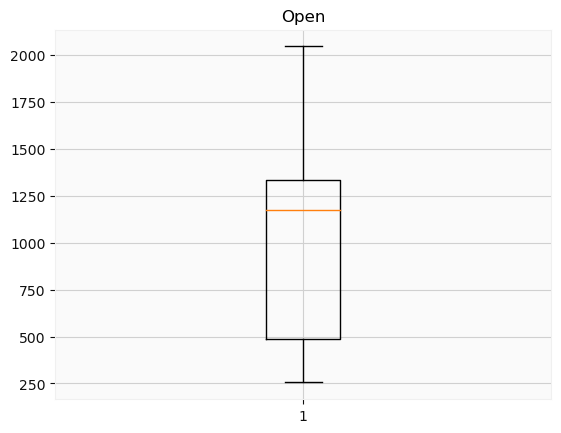

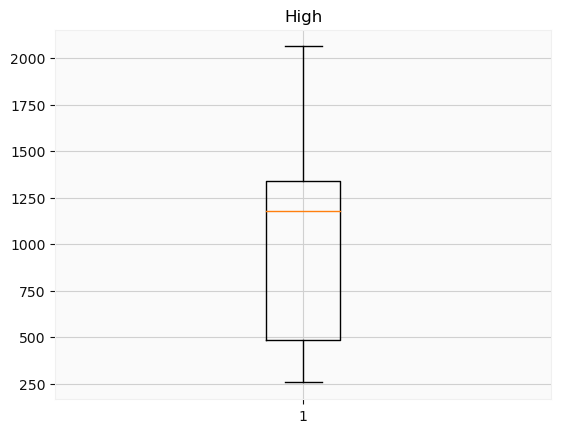

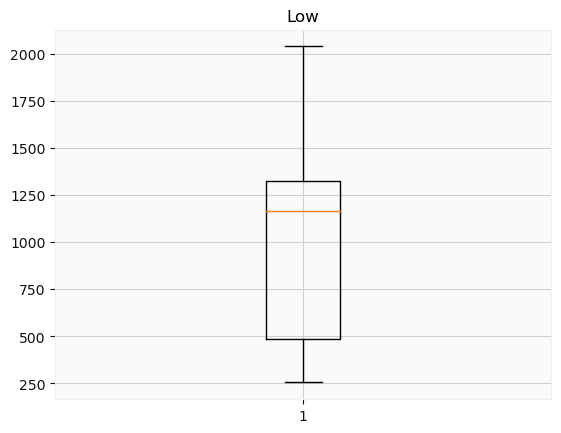

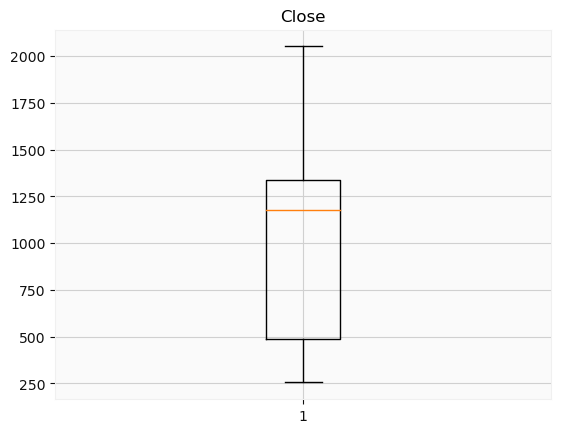

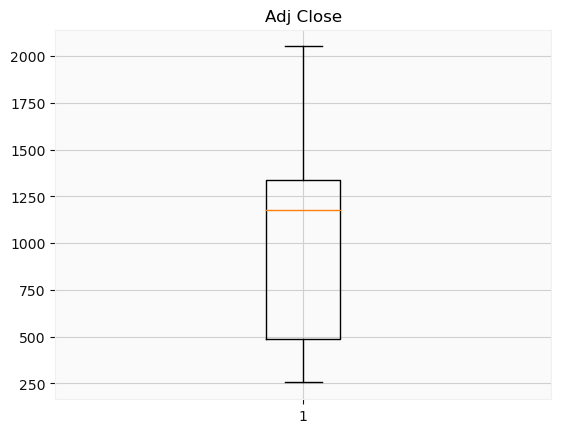

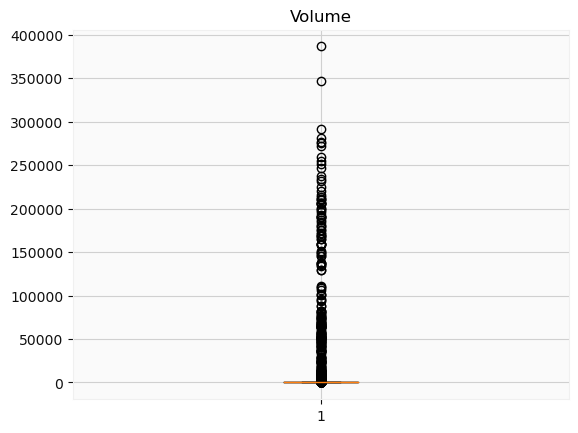

In [26]:
for col in list(df.columns):
    plt.boxplot(df[col])
    plt.title(f"{col}")
    plt.show()


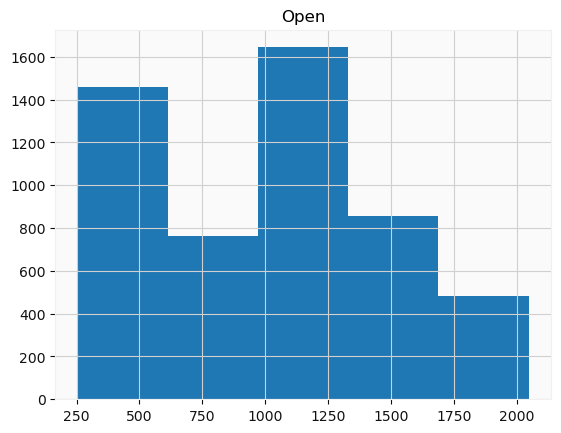

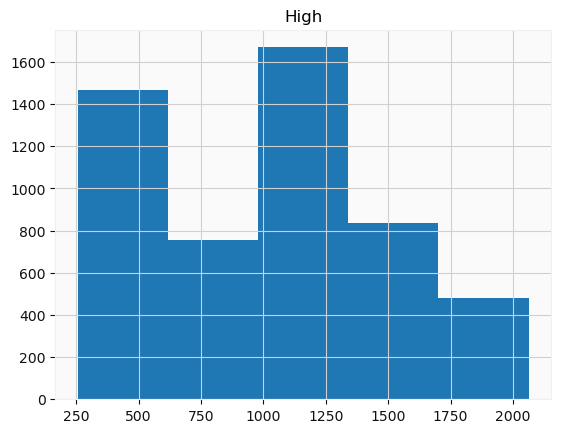

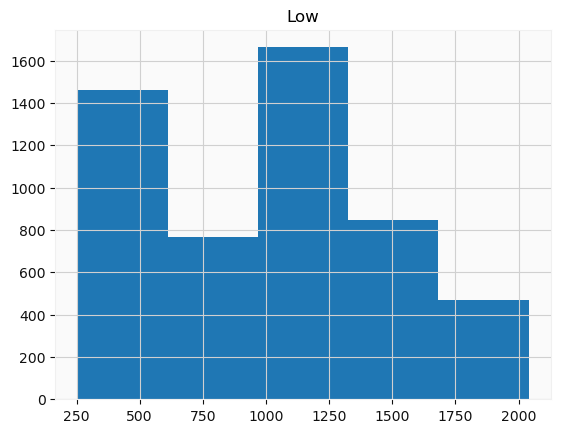

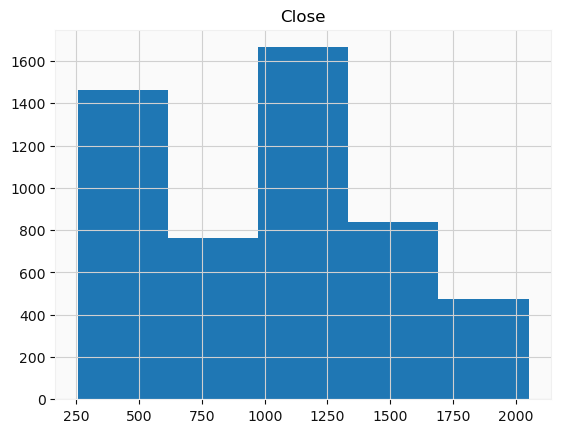

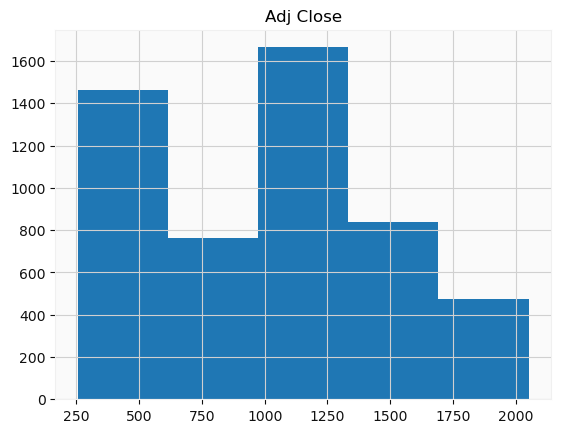

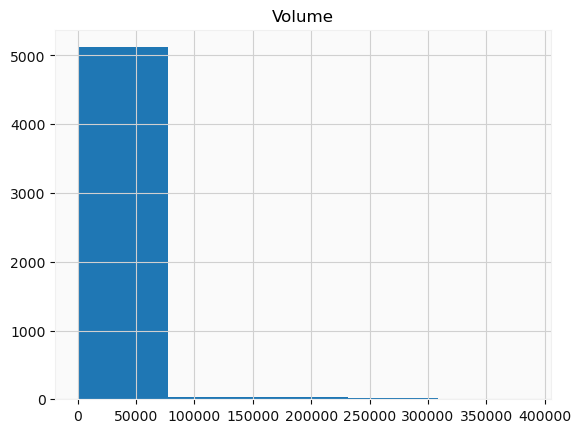

In [27]:
for col in df.columns:
    plt.hist(df[col],bins=5)
    plt.title(f"{col}")
    plt.show()

In [28]:
df.index = pd.to_datetime(df.index,format="%Y-%m-%d")

### Yearly plots

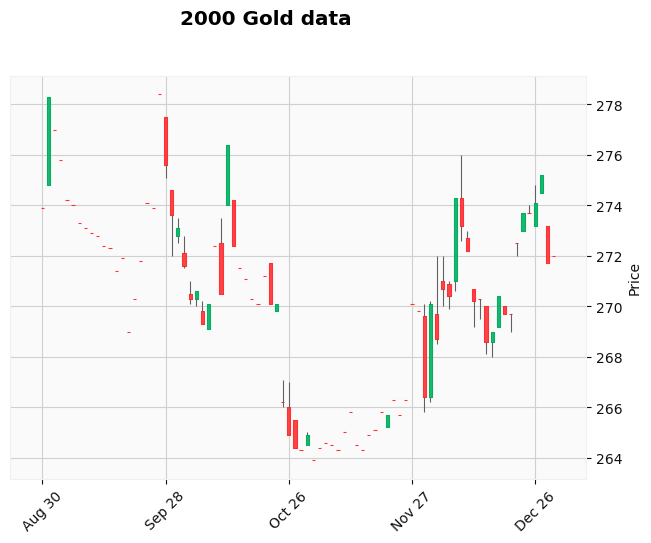

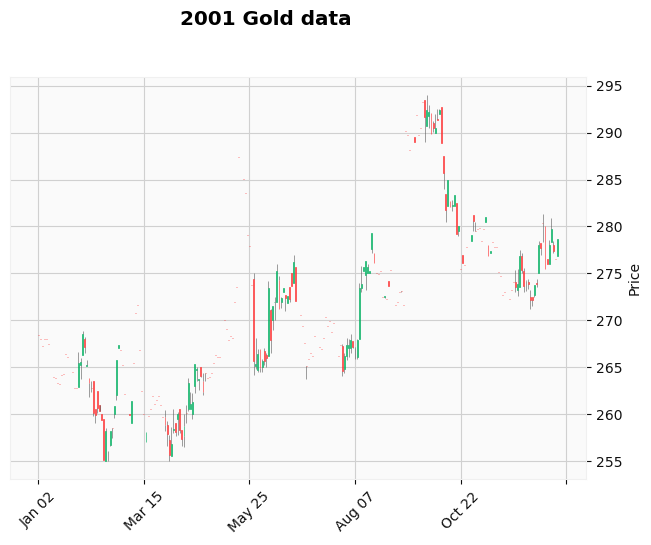

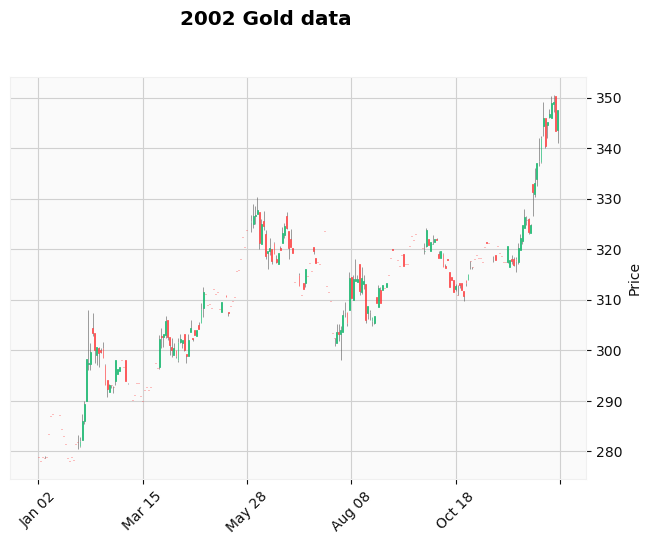

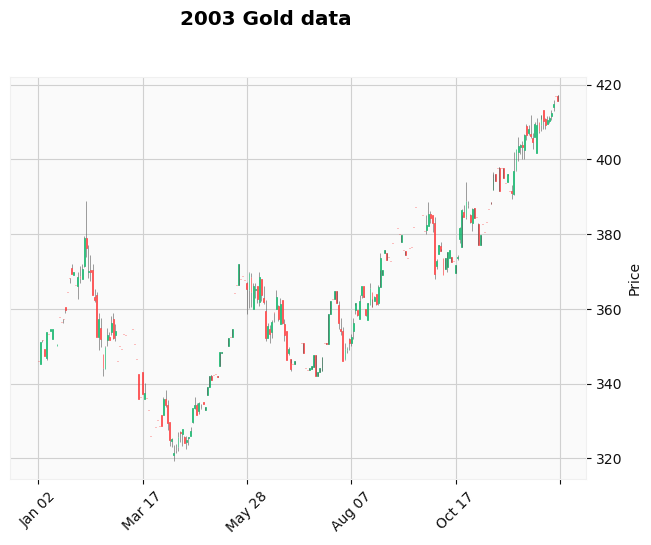

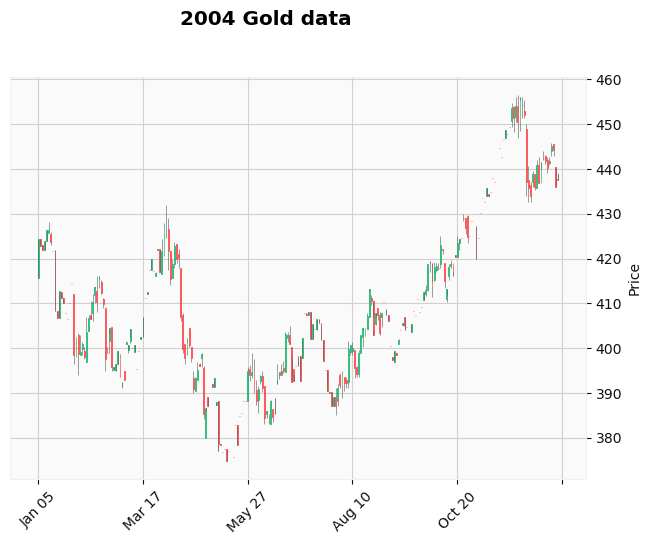

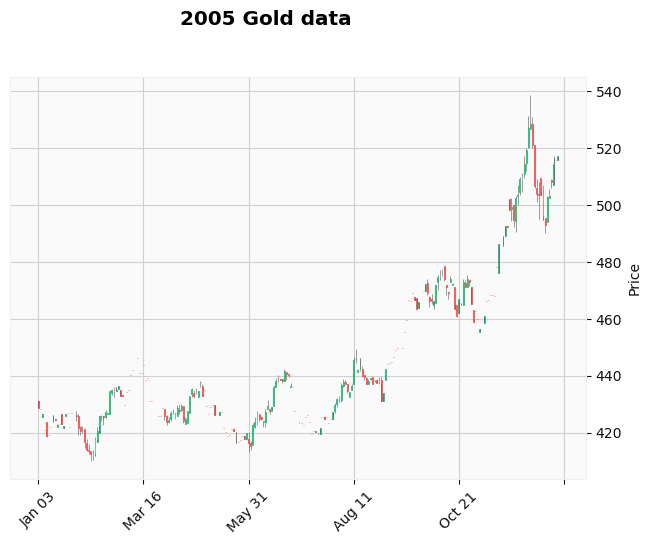

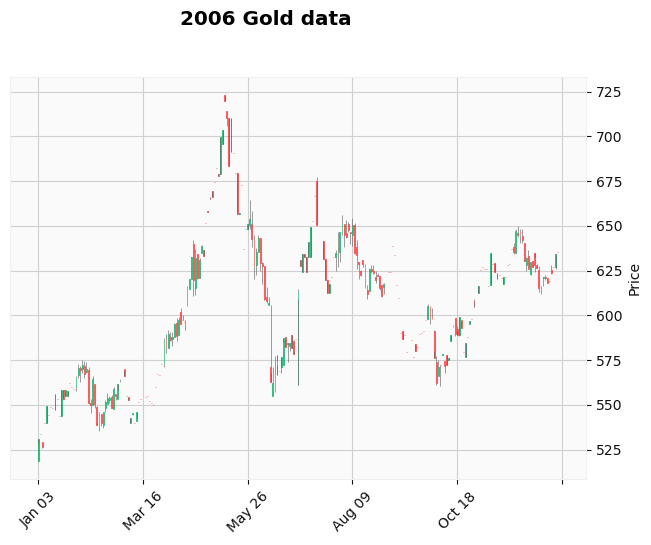

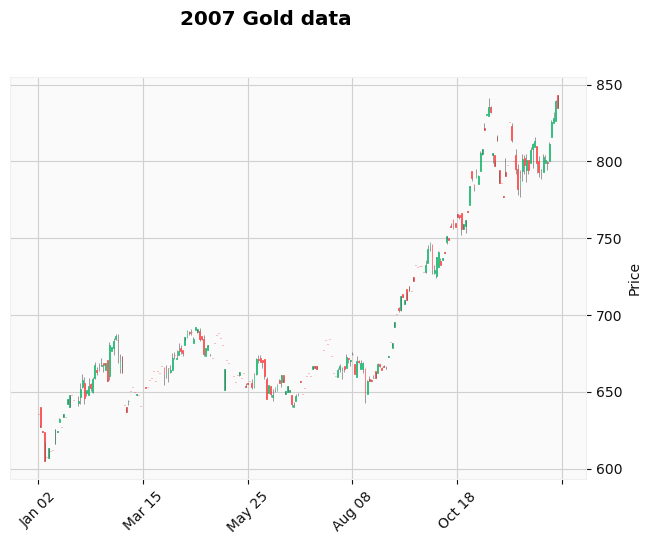

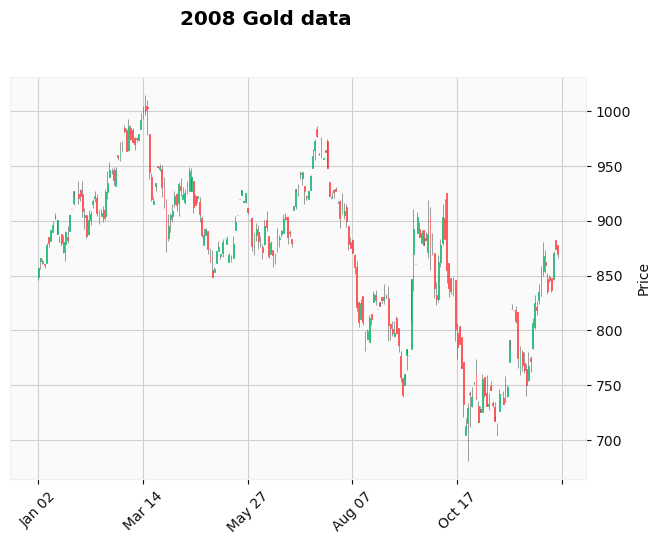

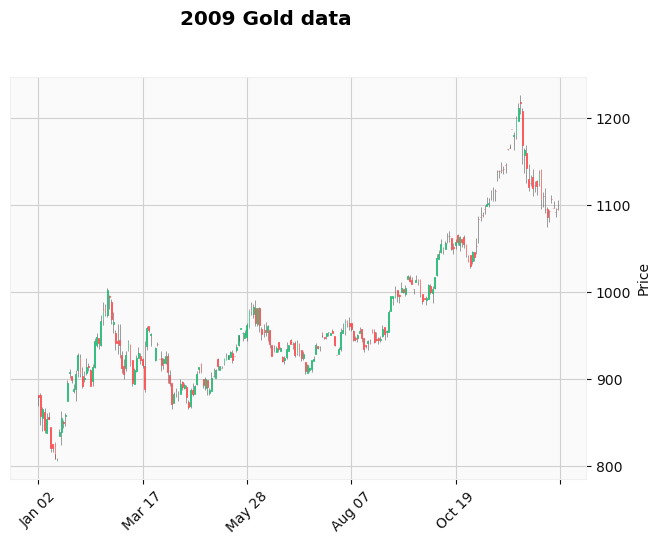

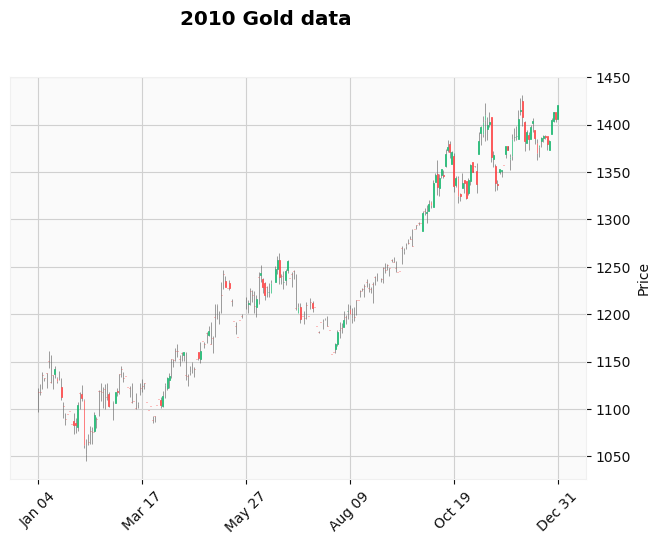

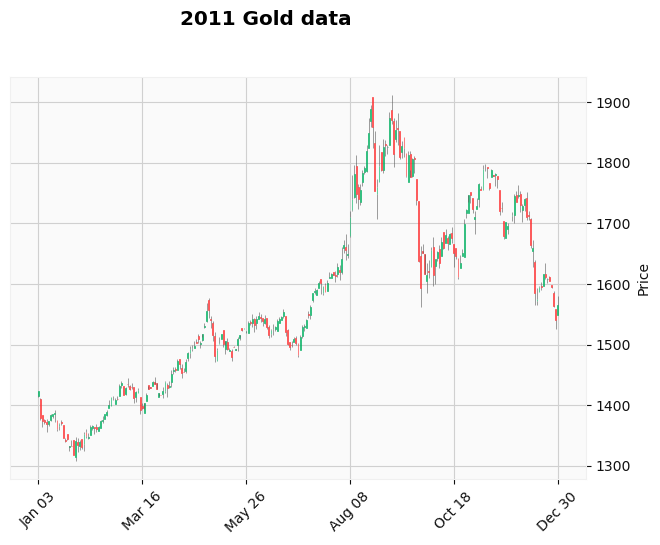

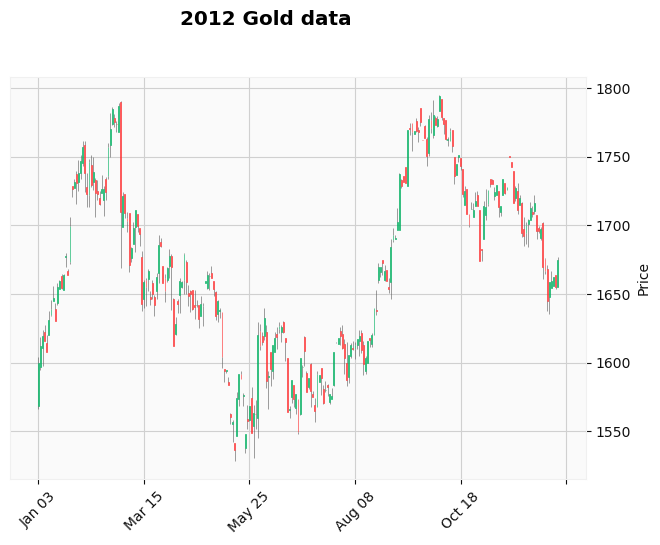

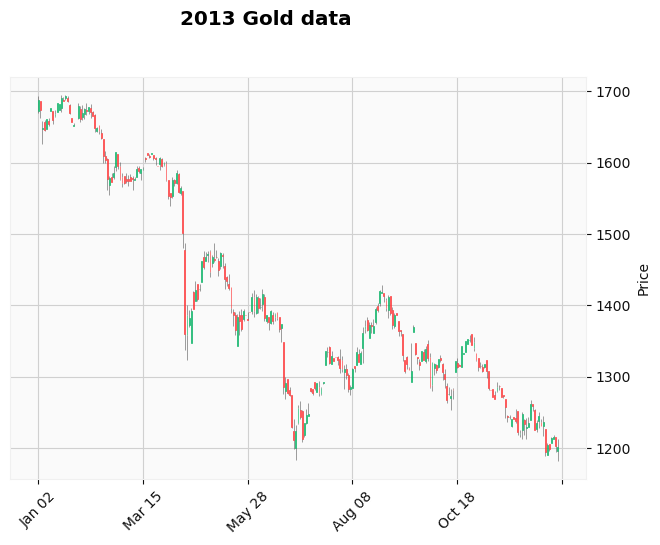

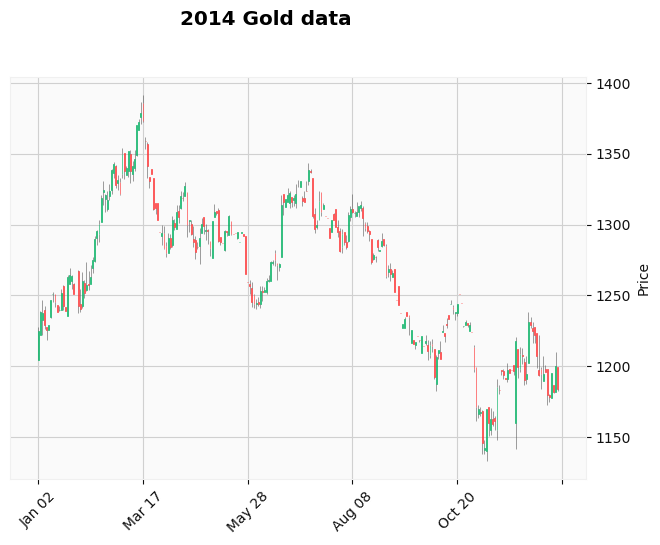

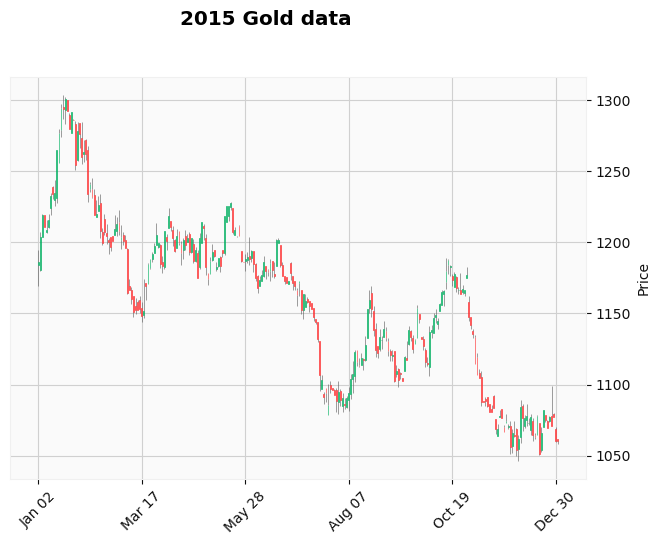

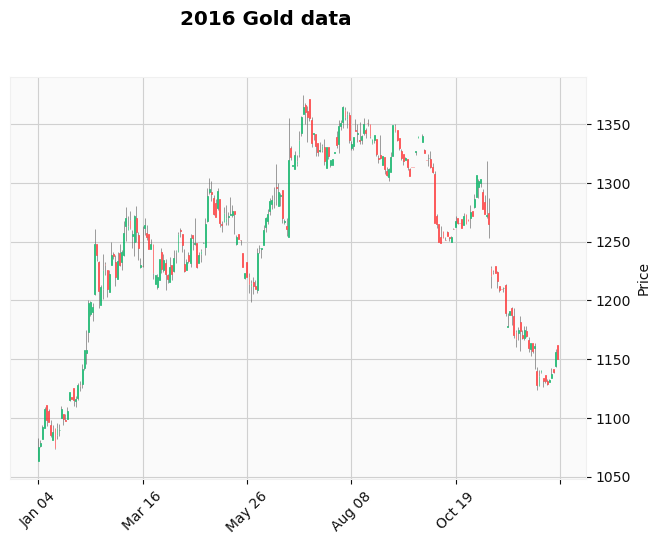

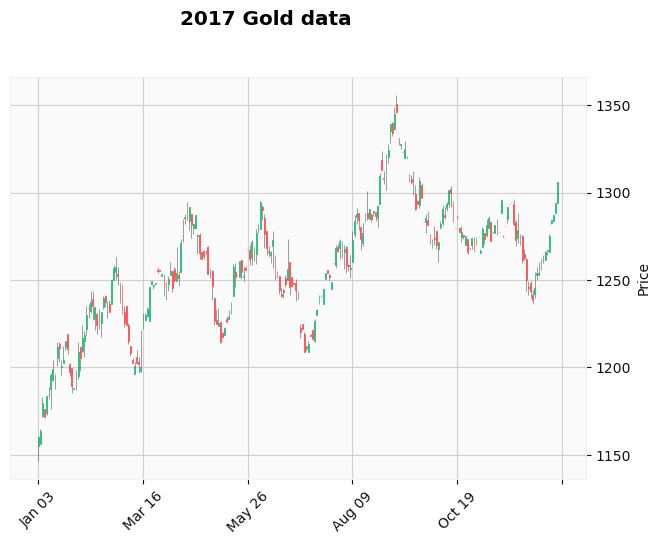

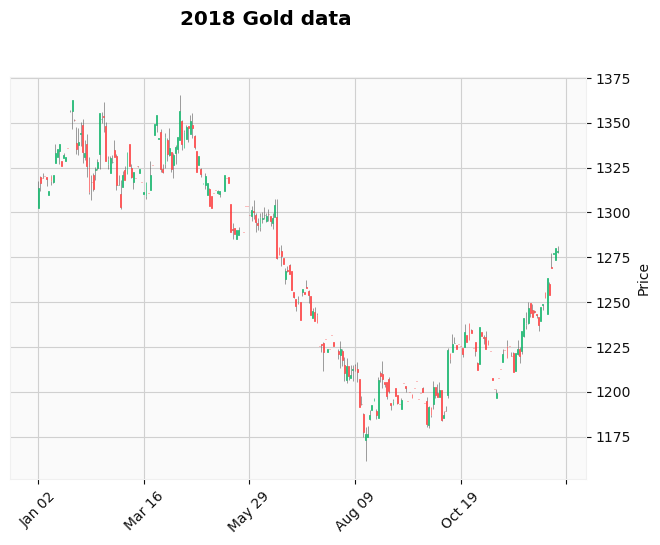

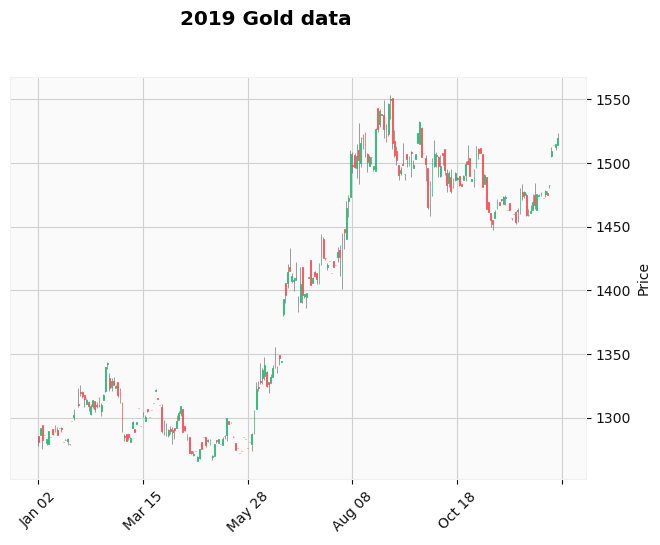

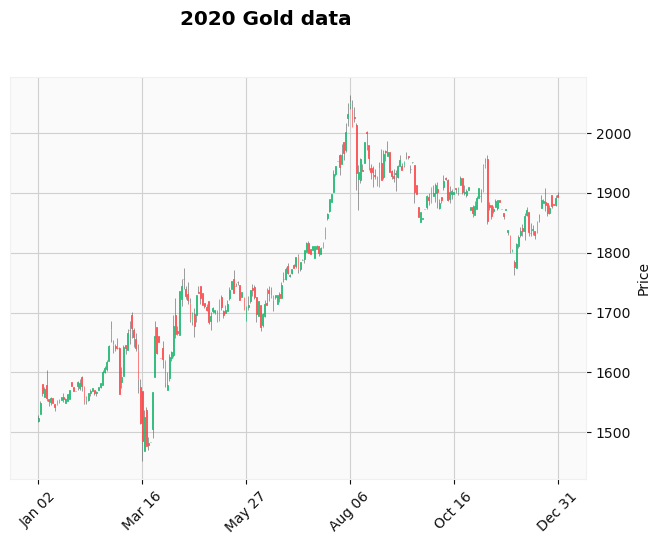

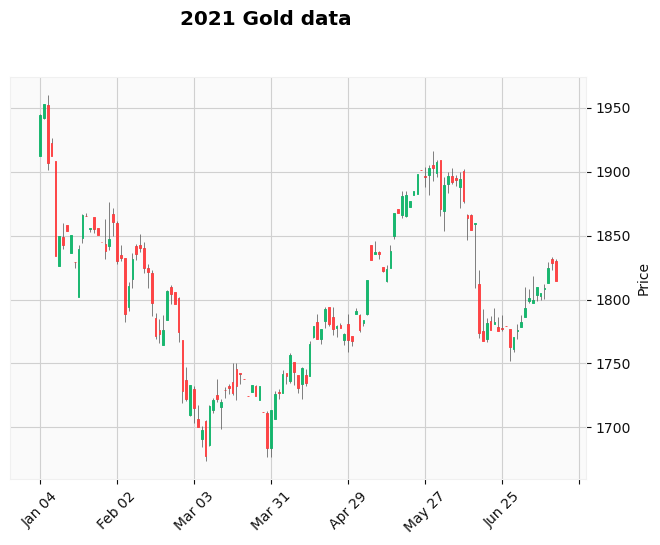

In [29]:
for year in df.index.year.unique():
    mpf.plot(df[df.index.year == year],type='candle',style='yahoo',title=f'{year} Gold data')

#### Month for all years comparison - pattern finding


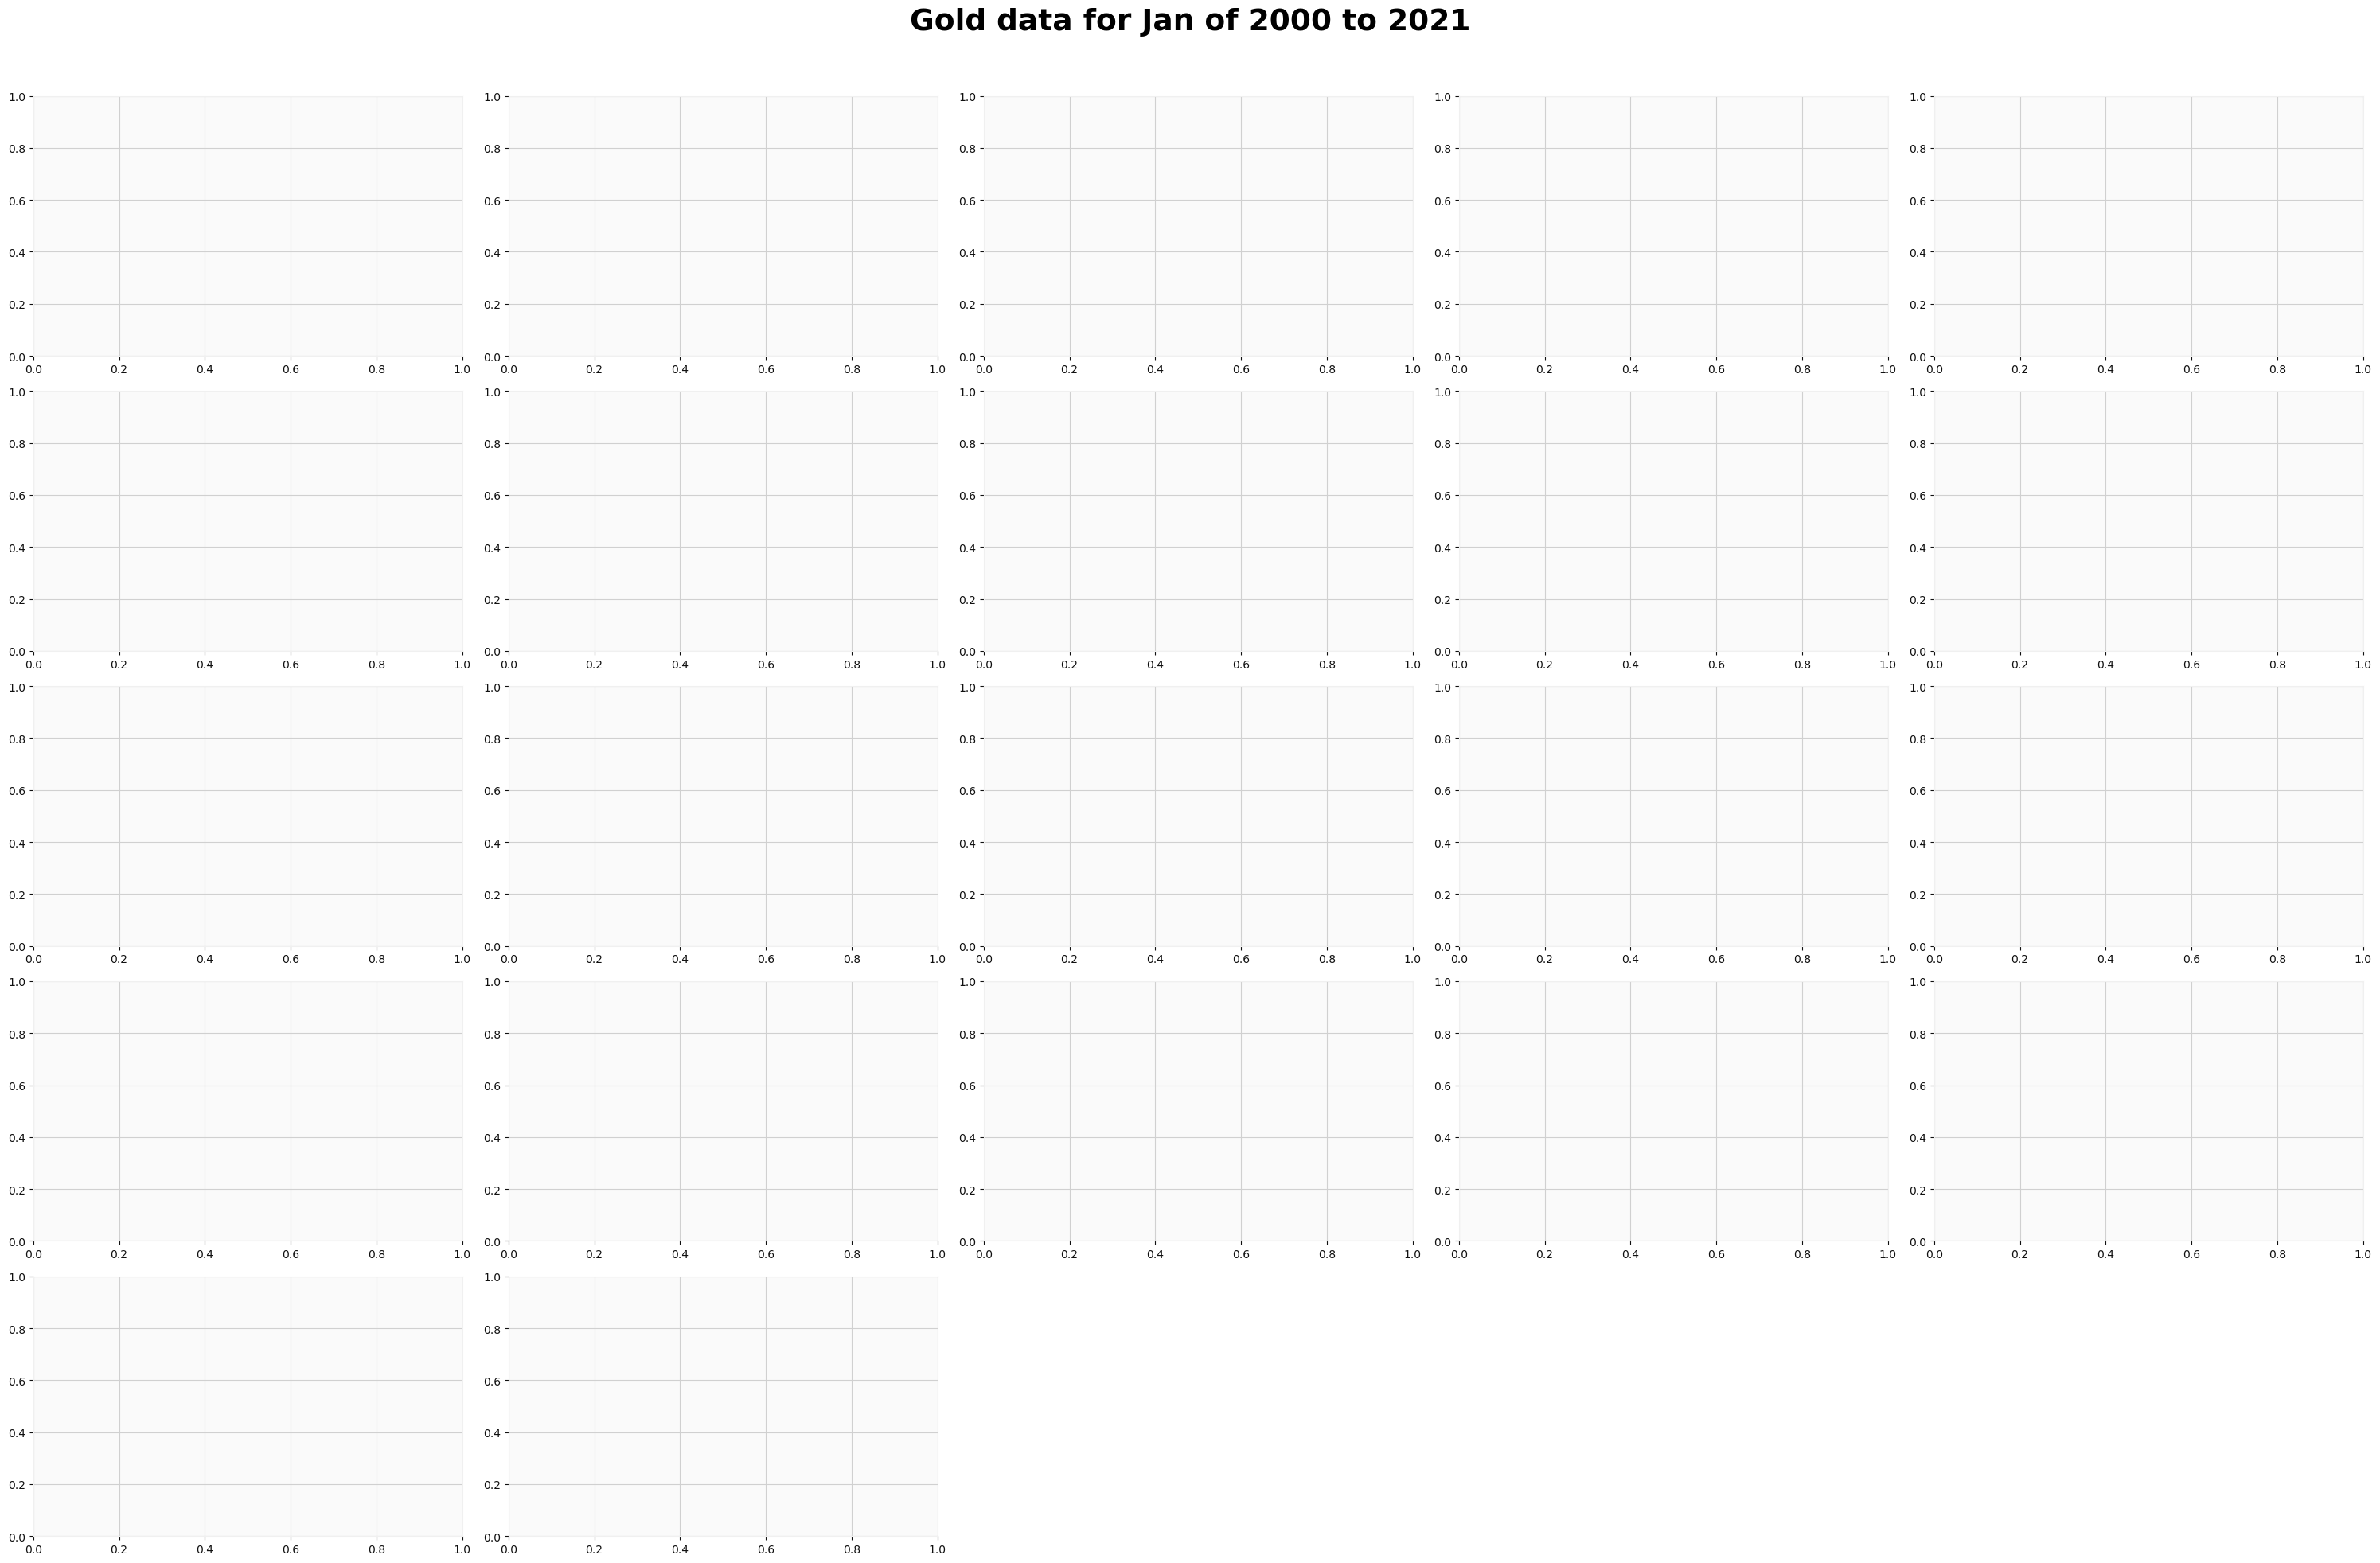

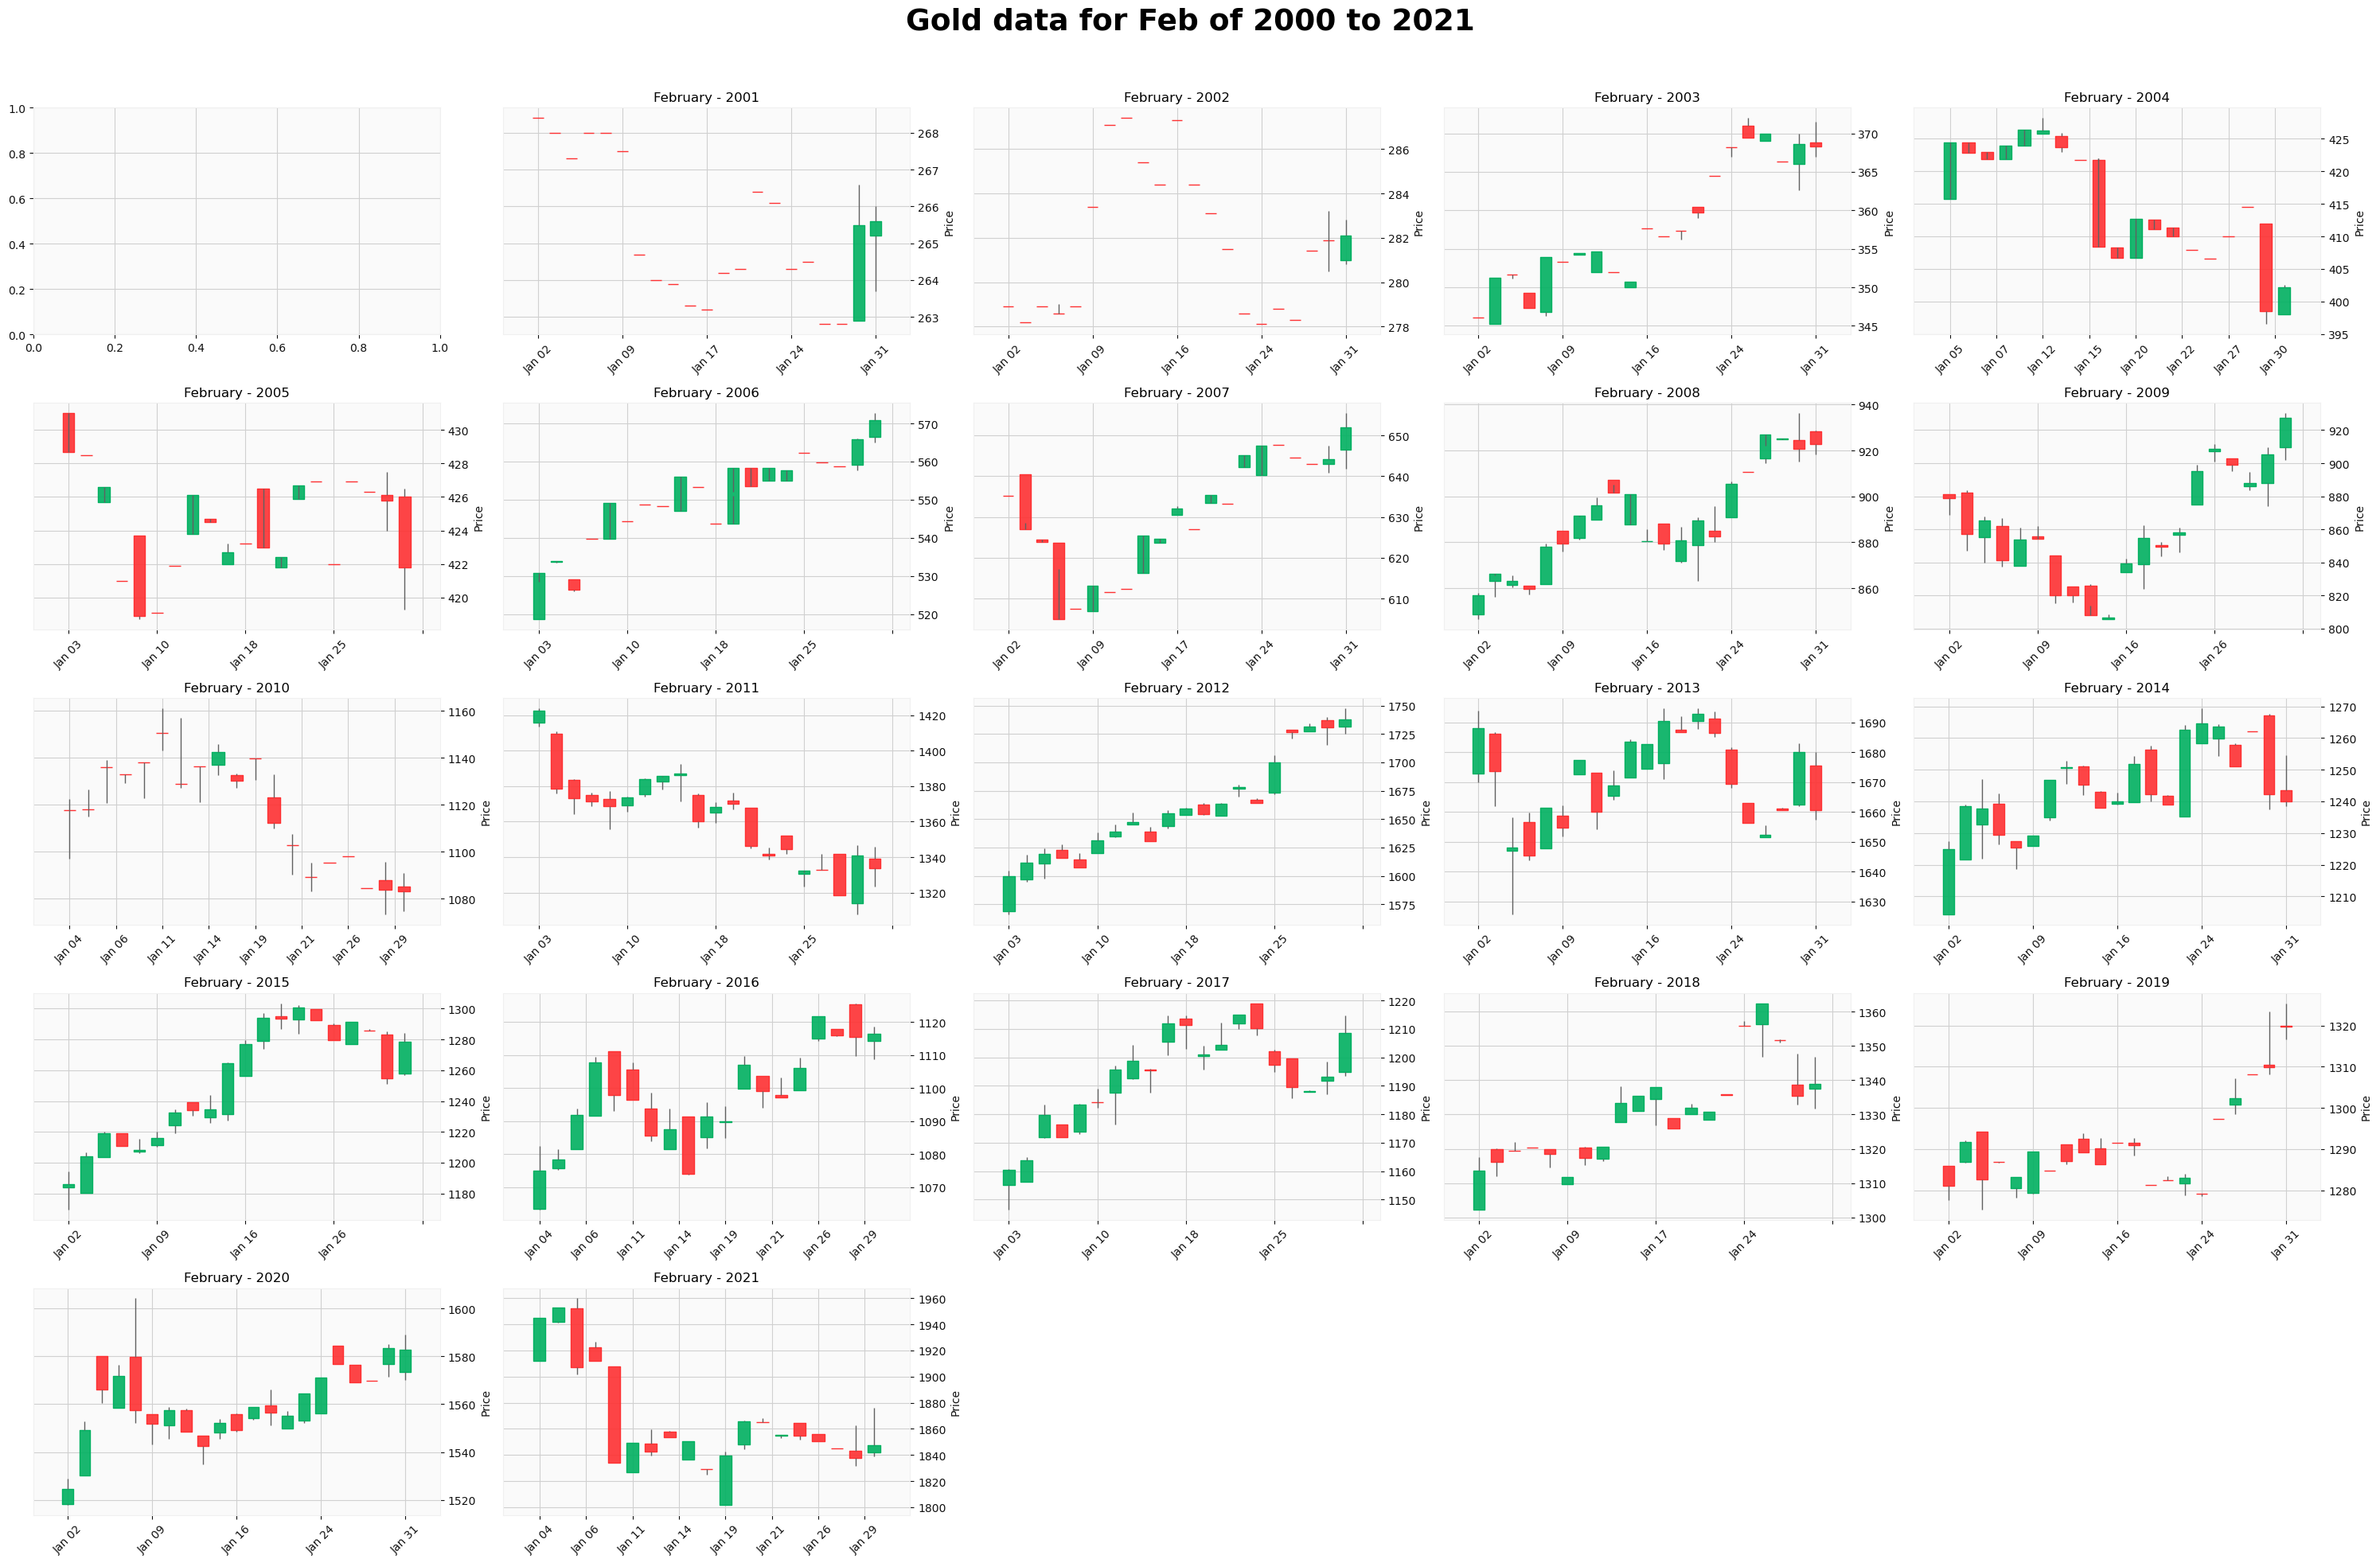

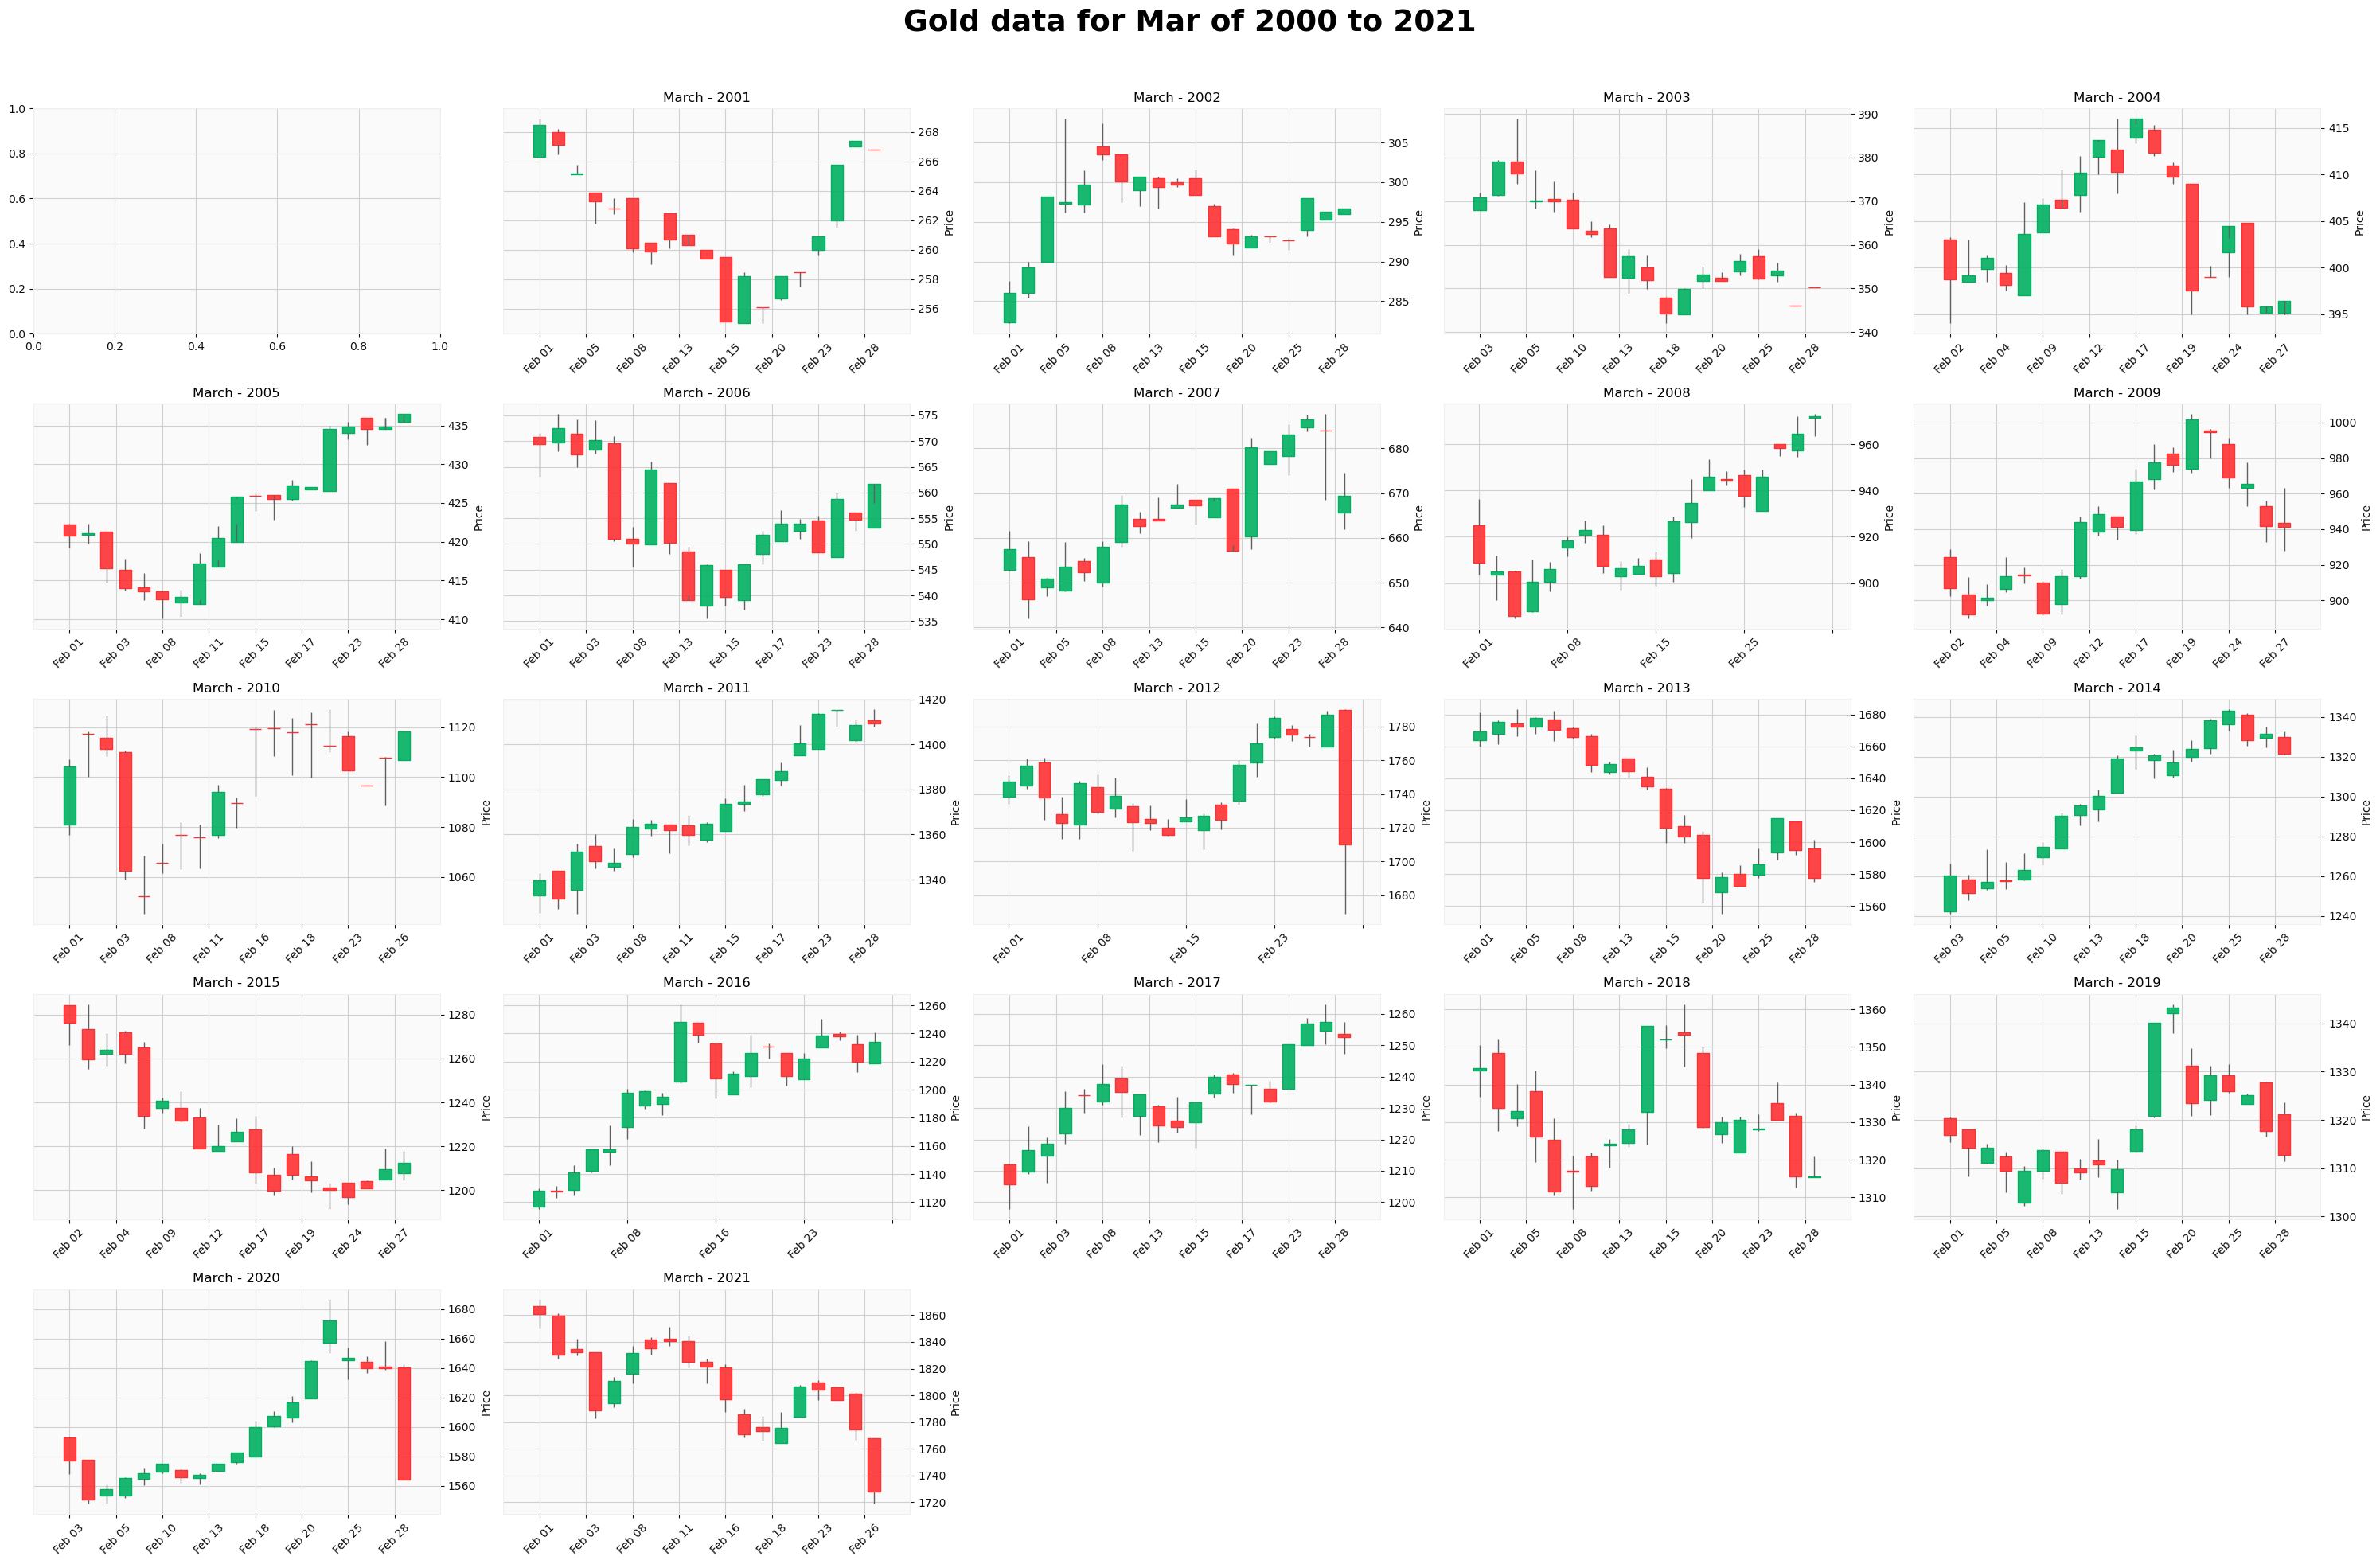

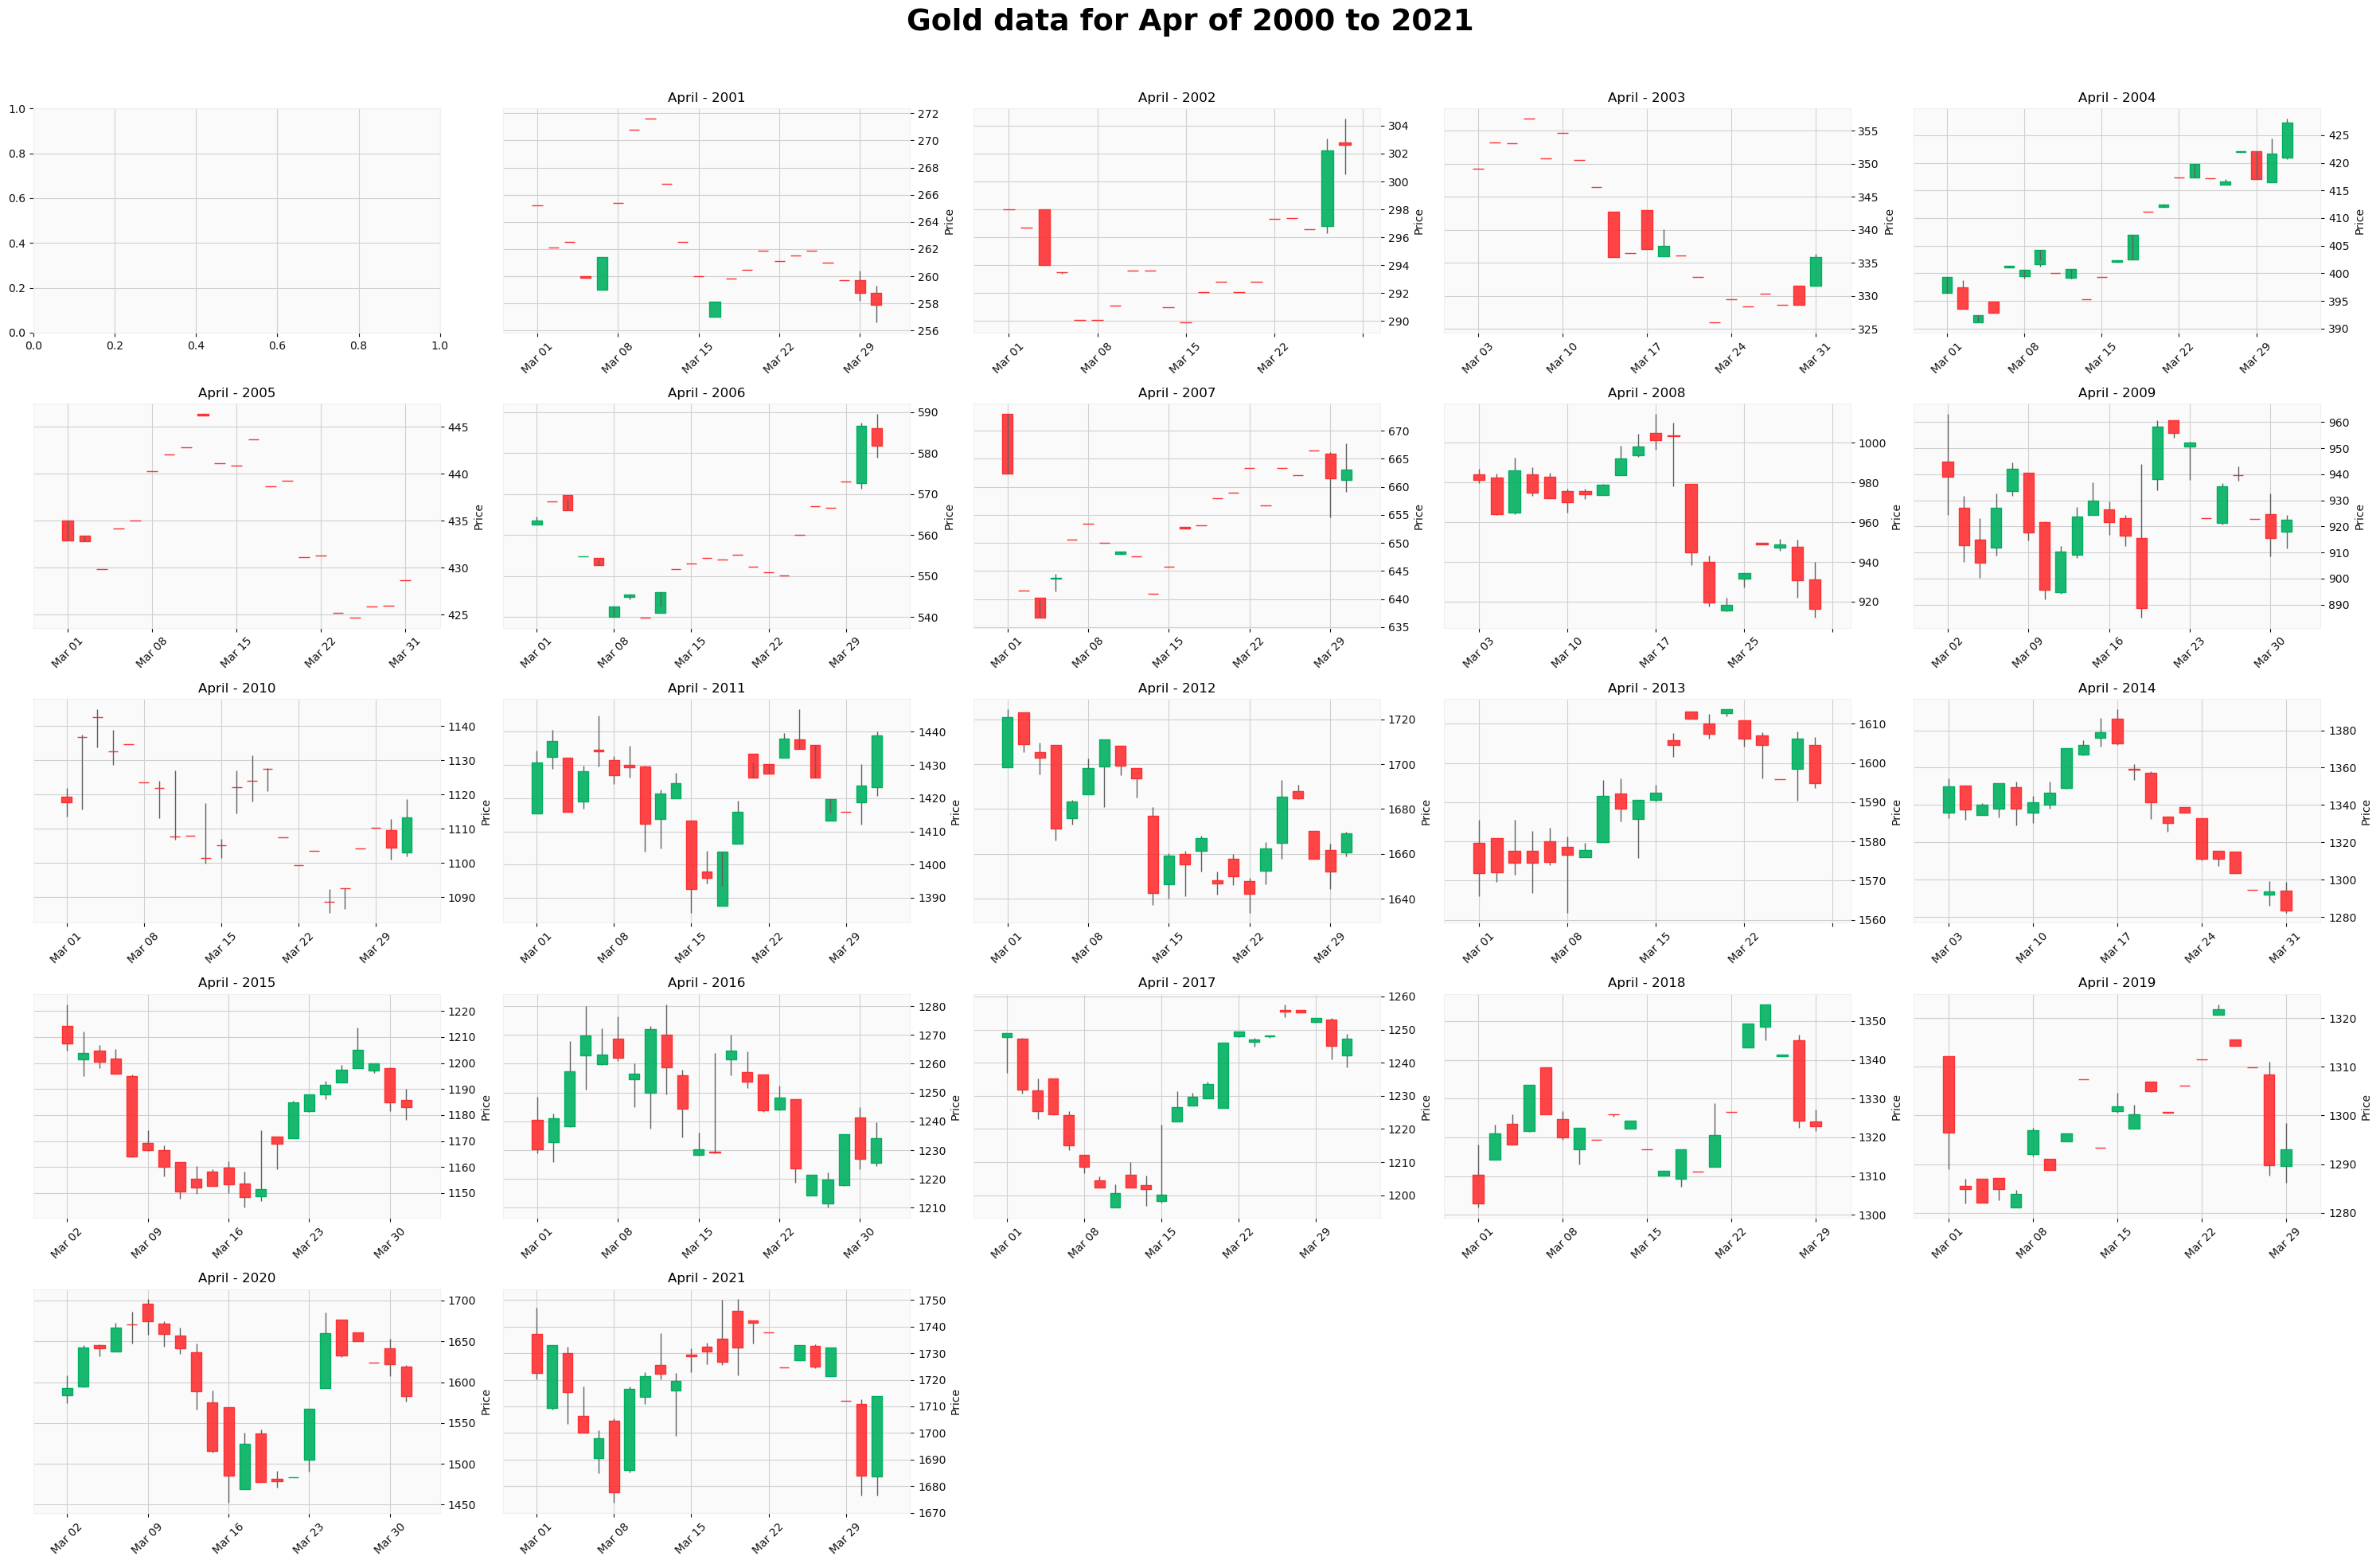

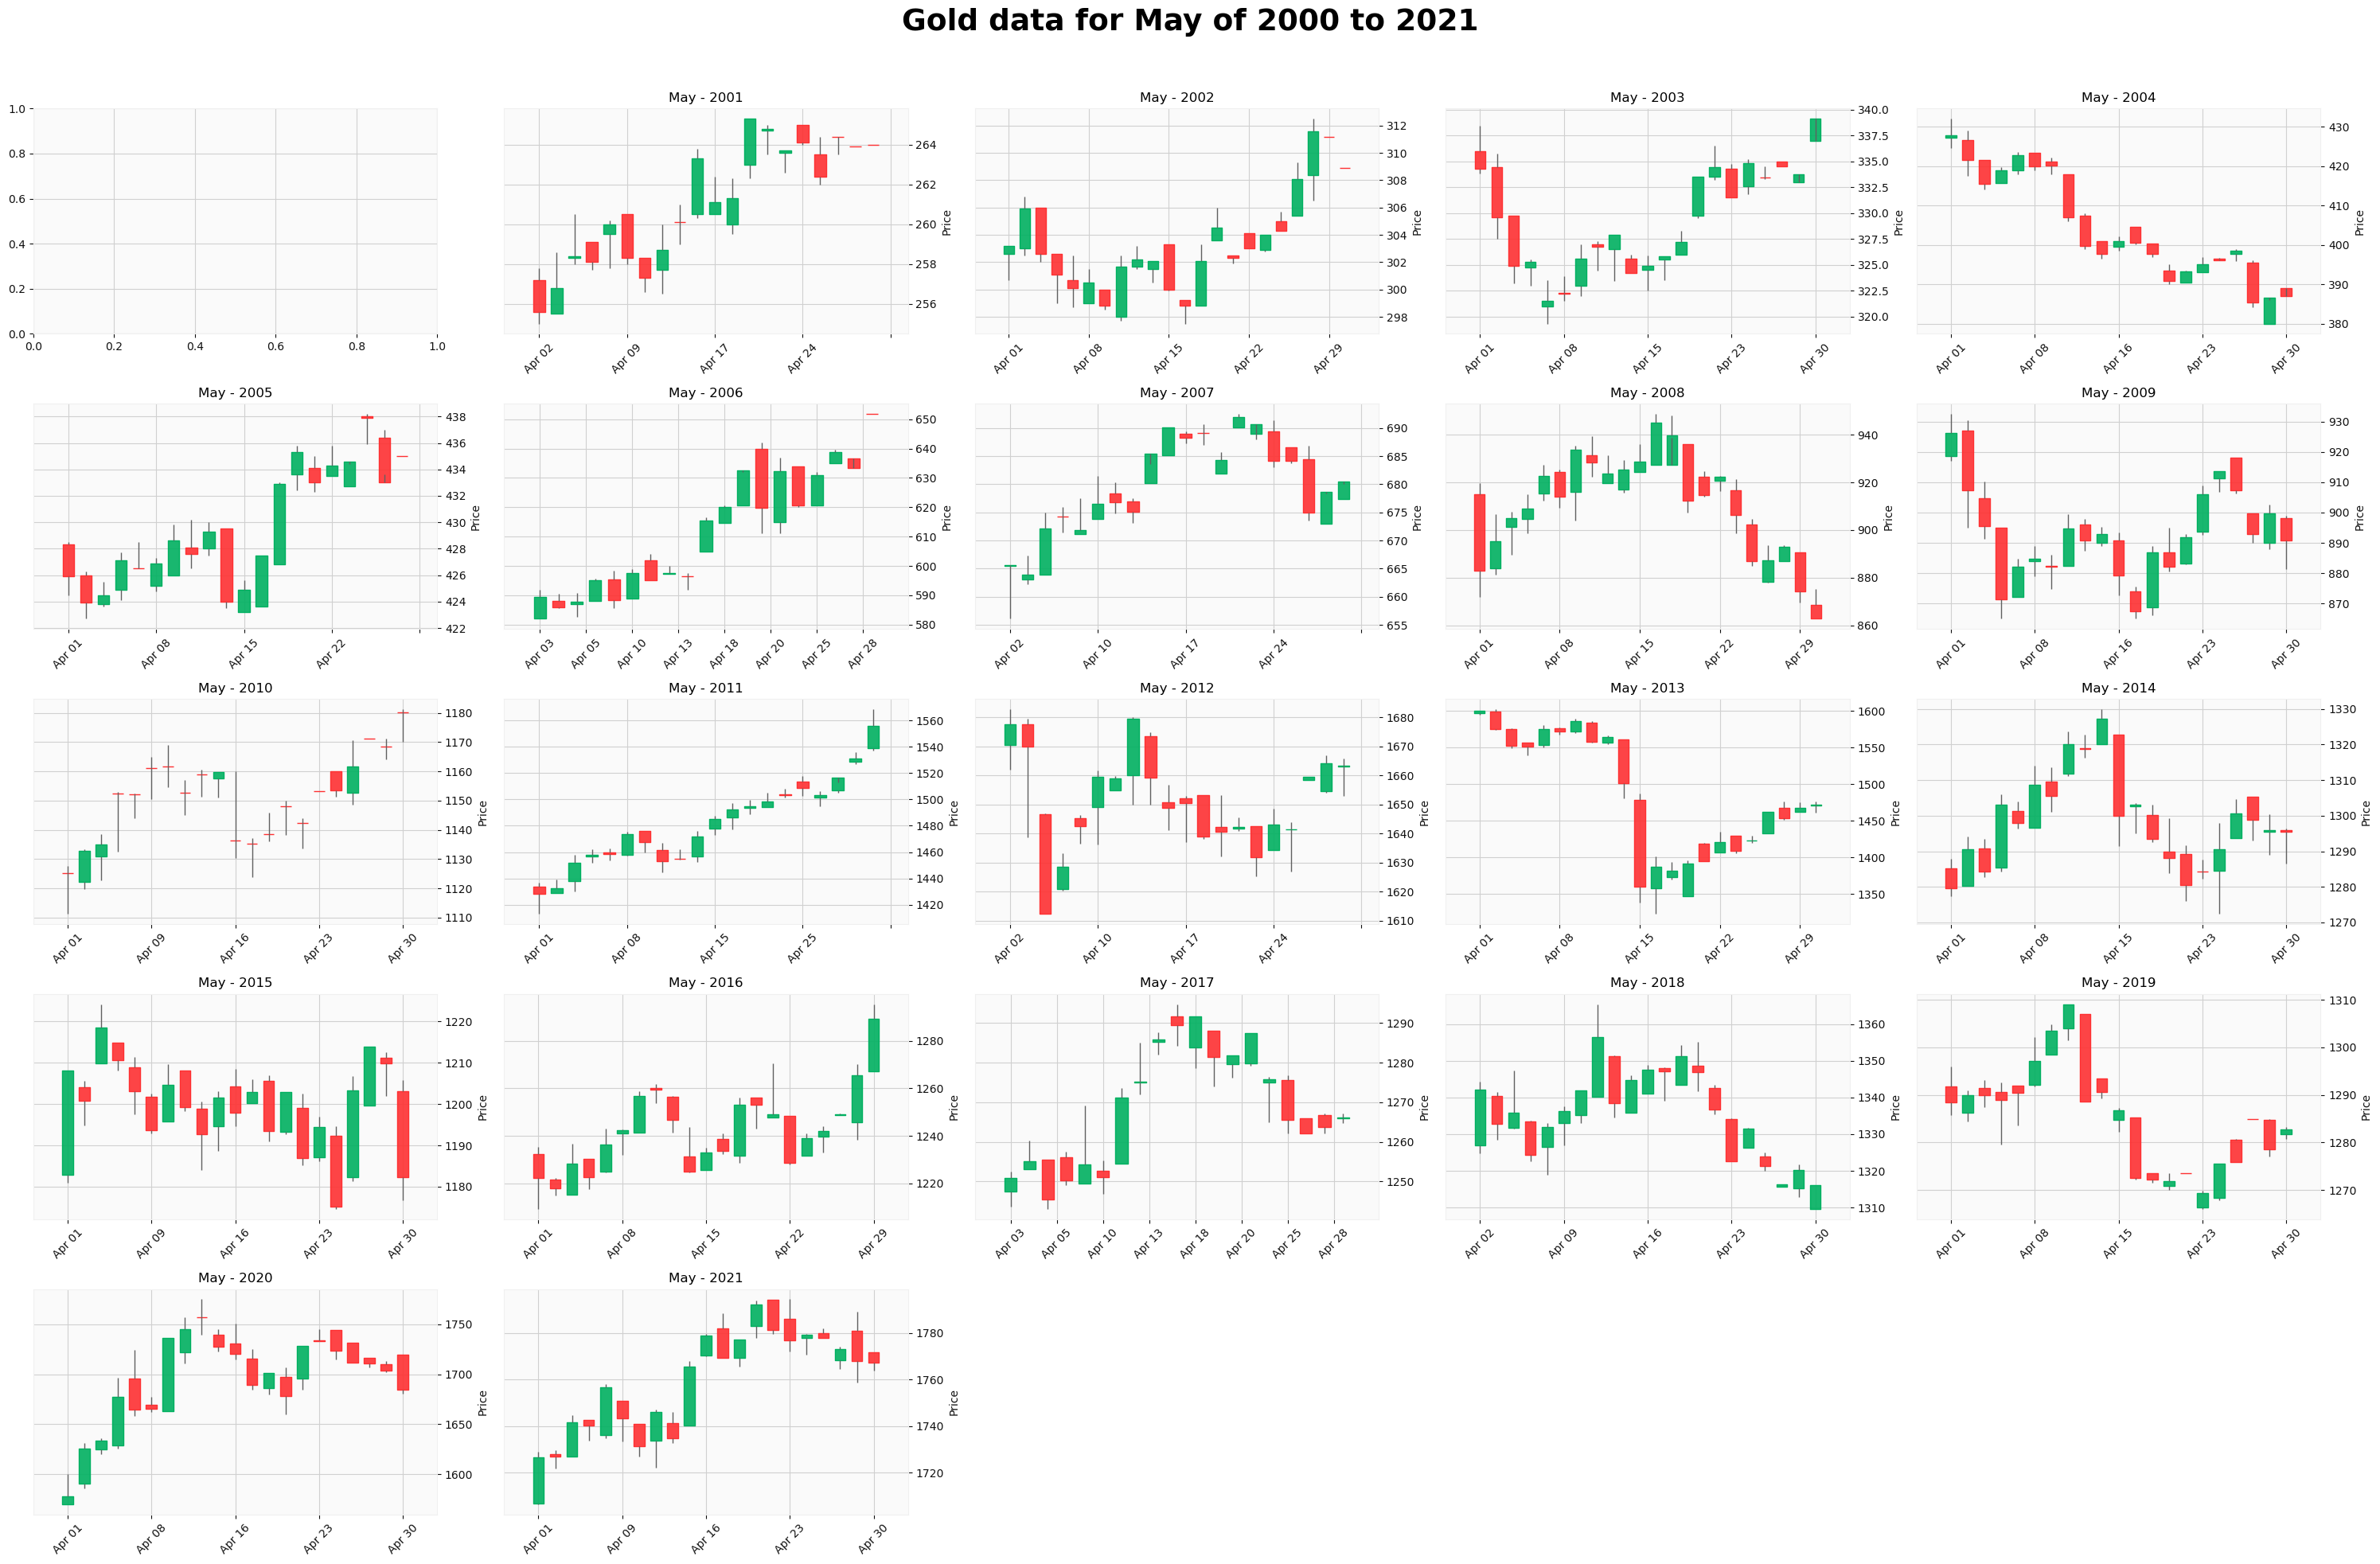

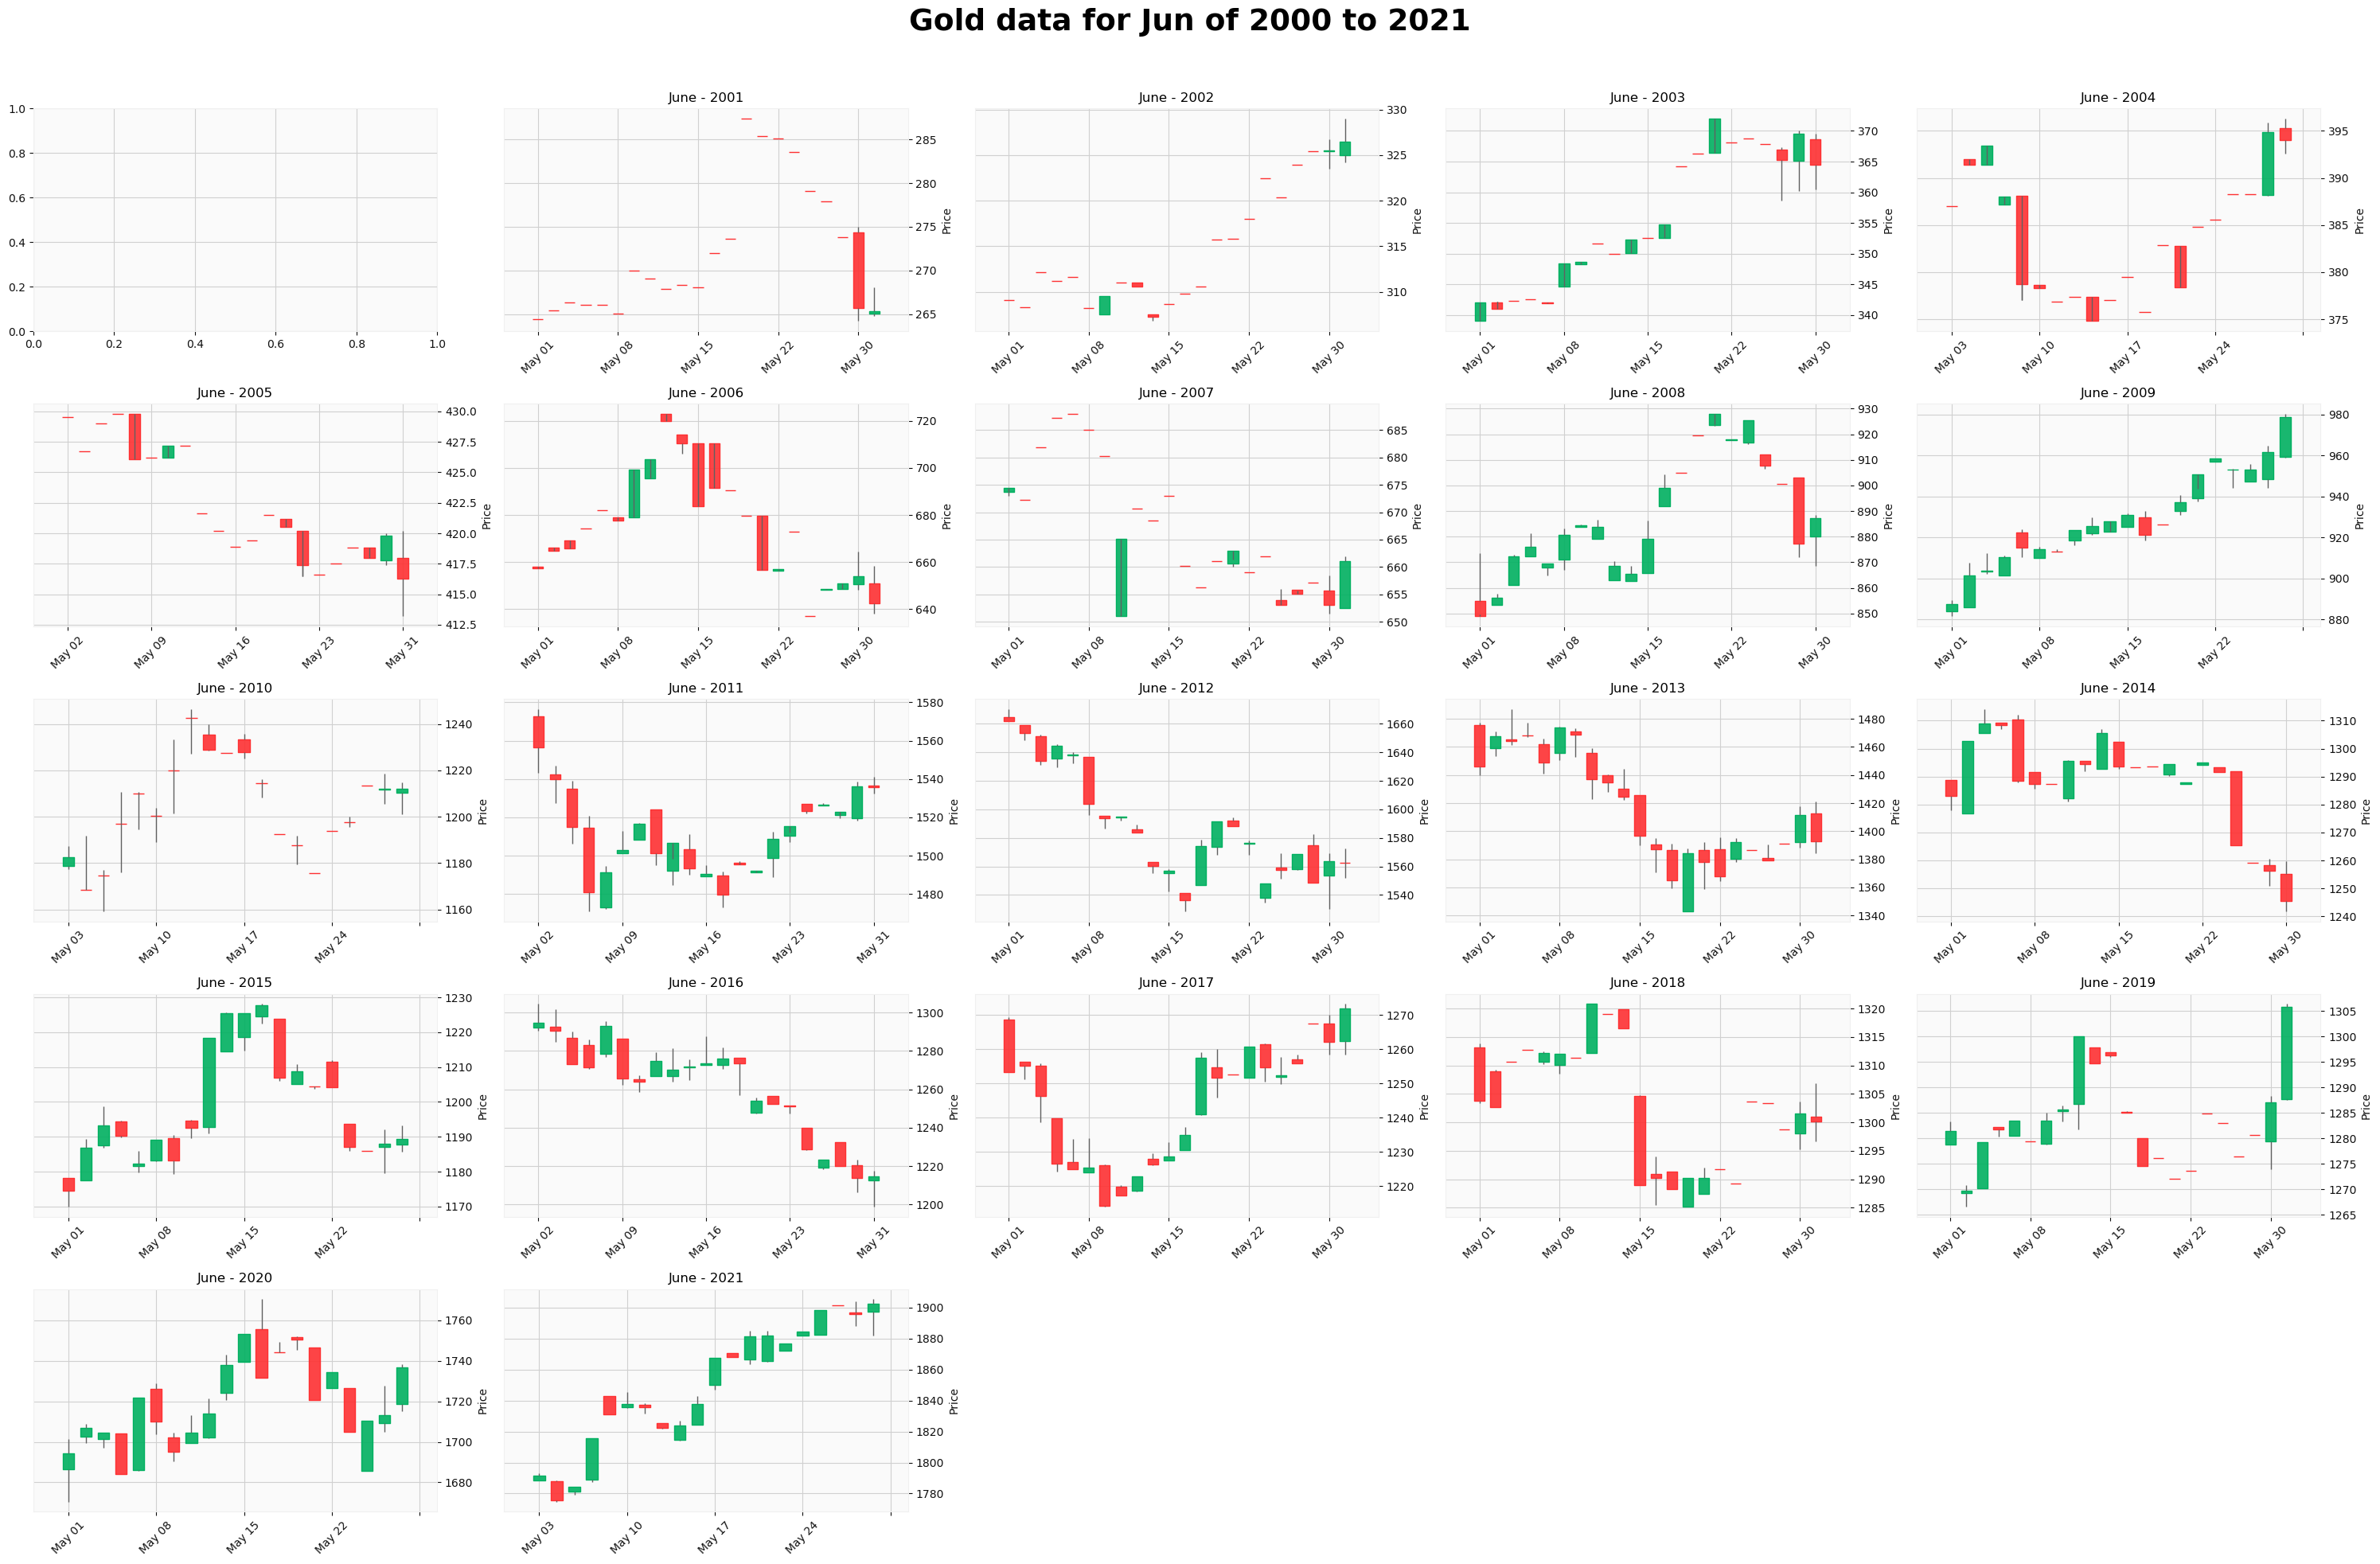

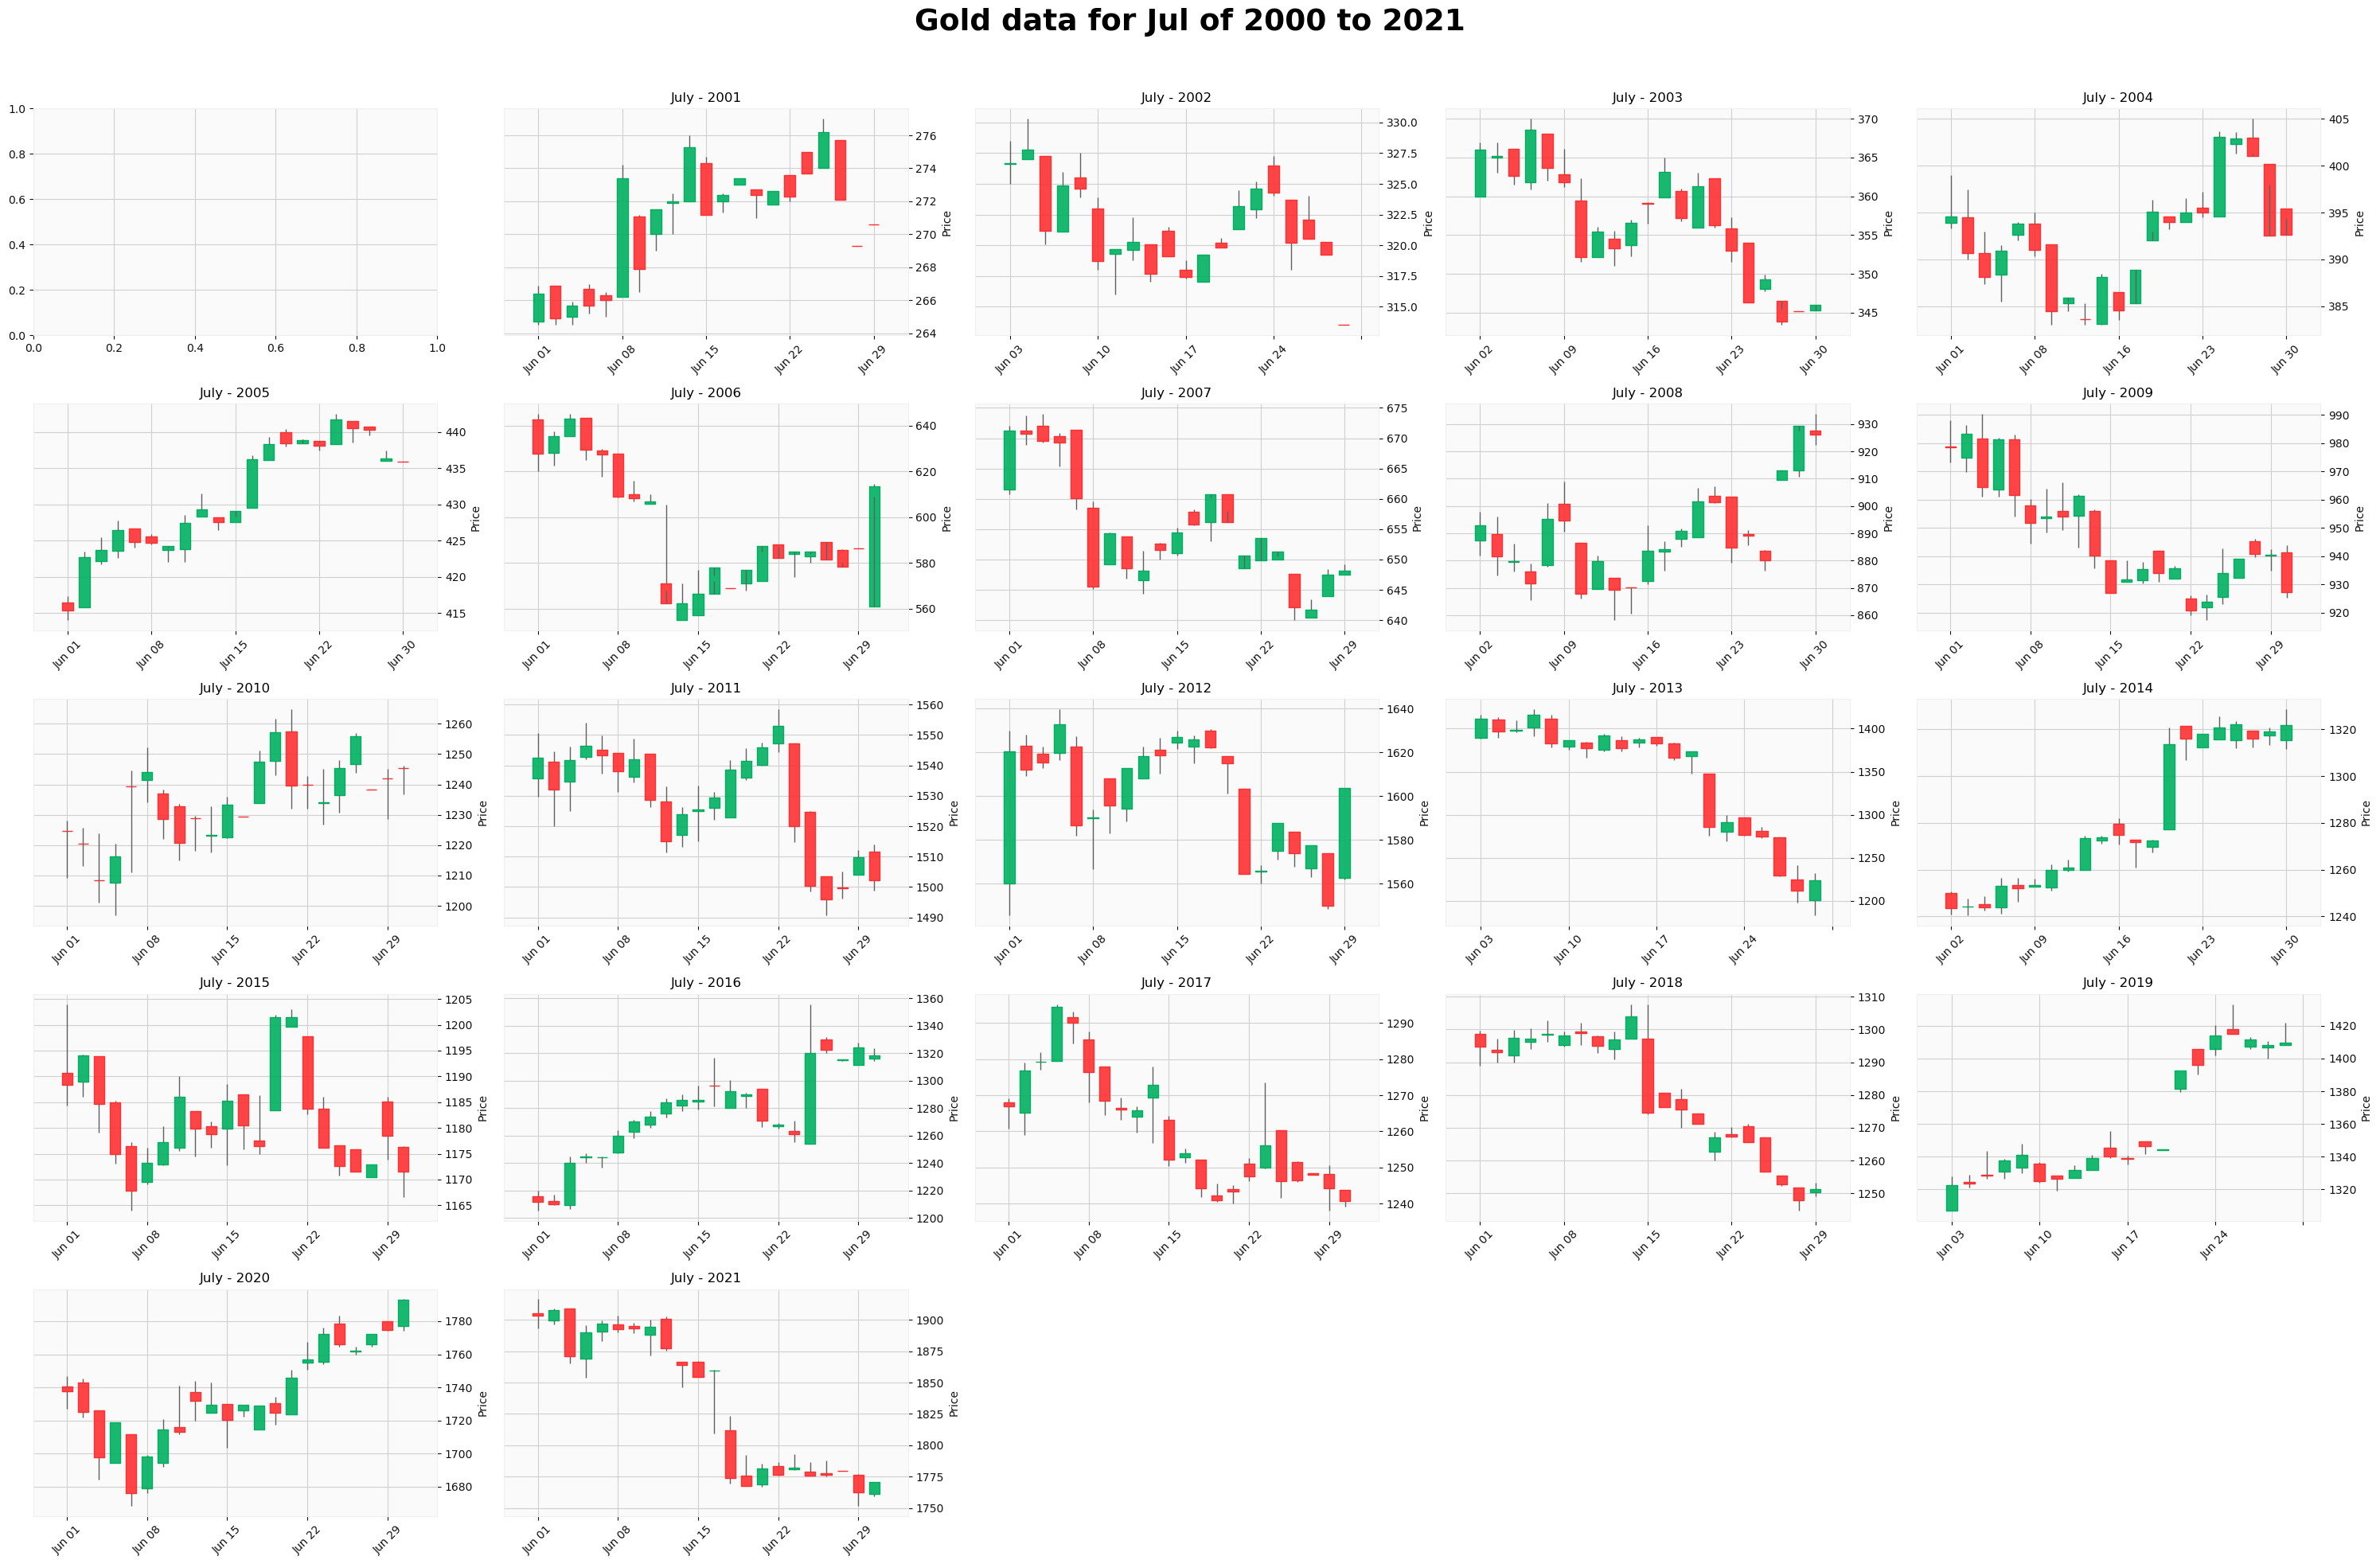

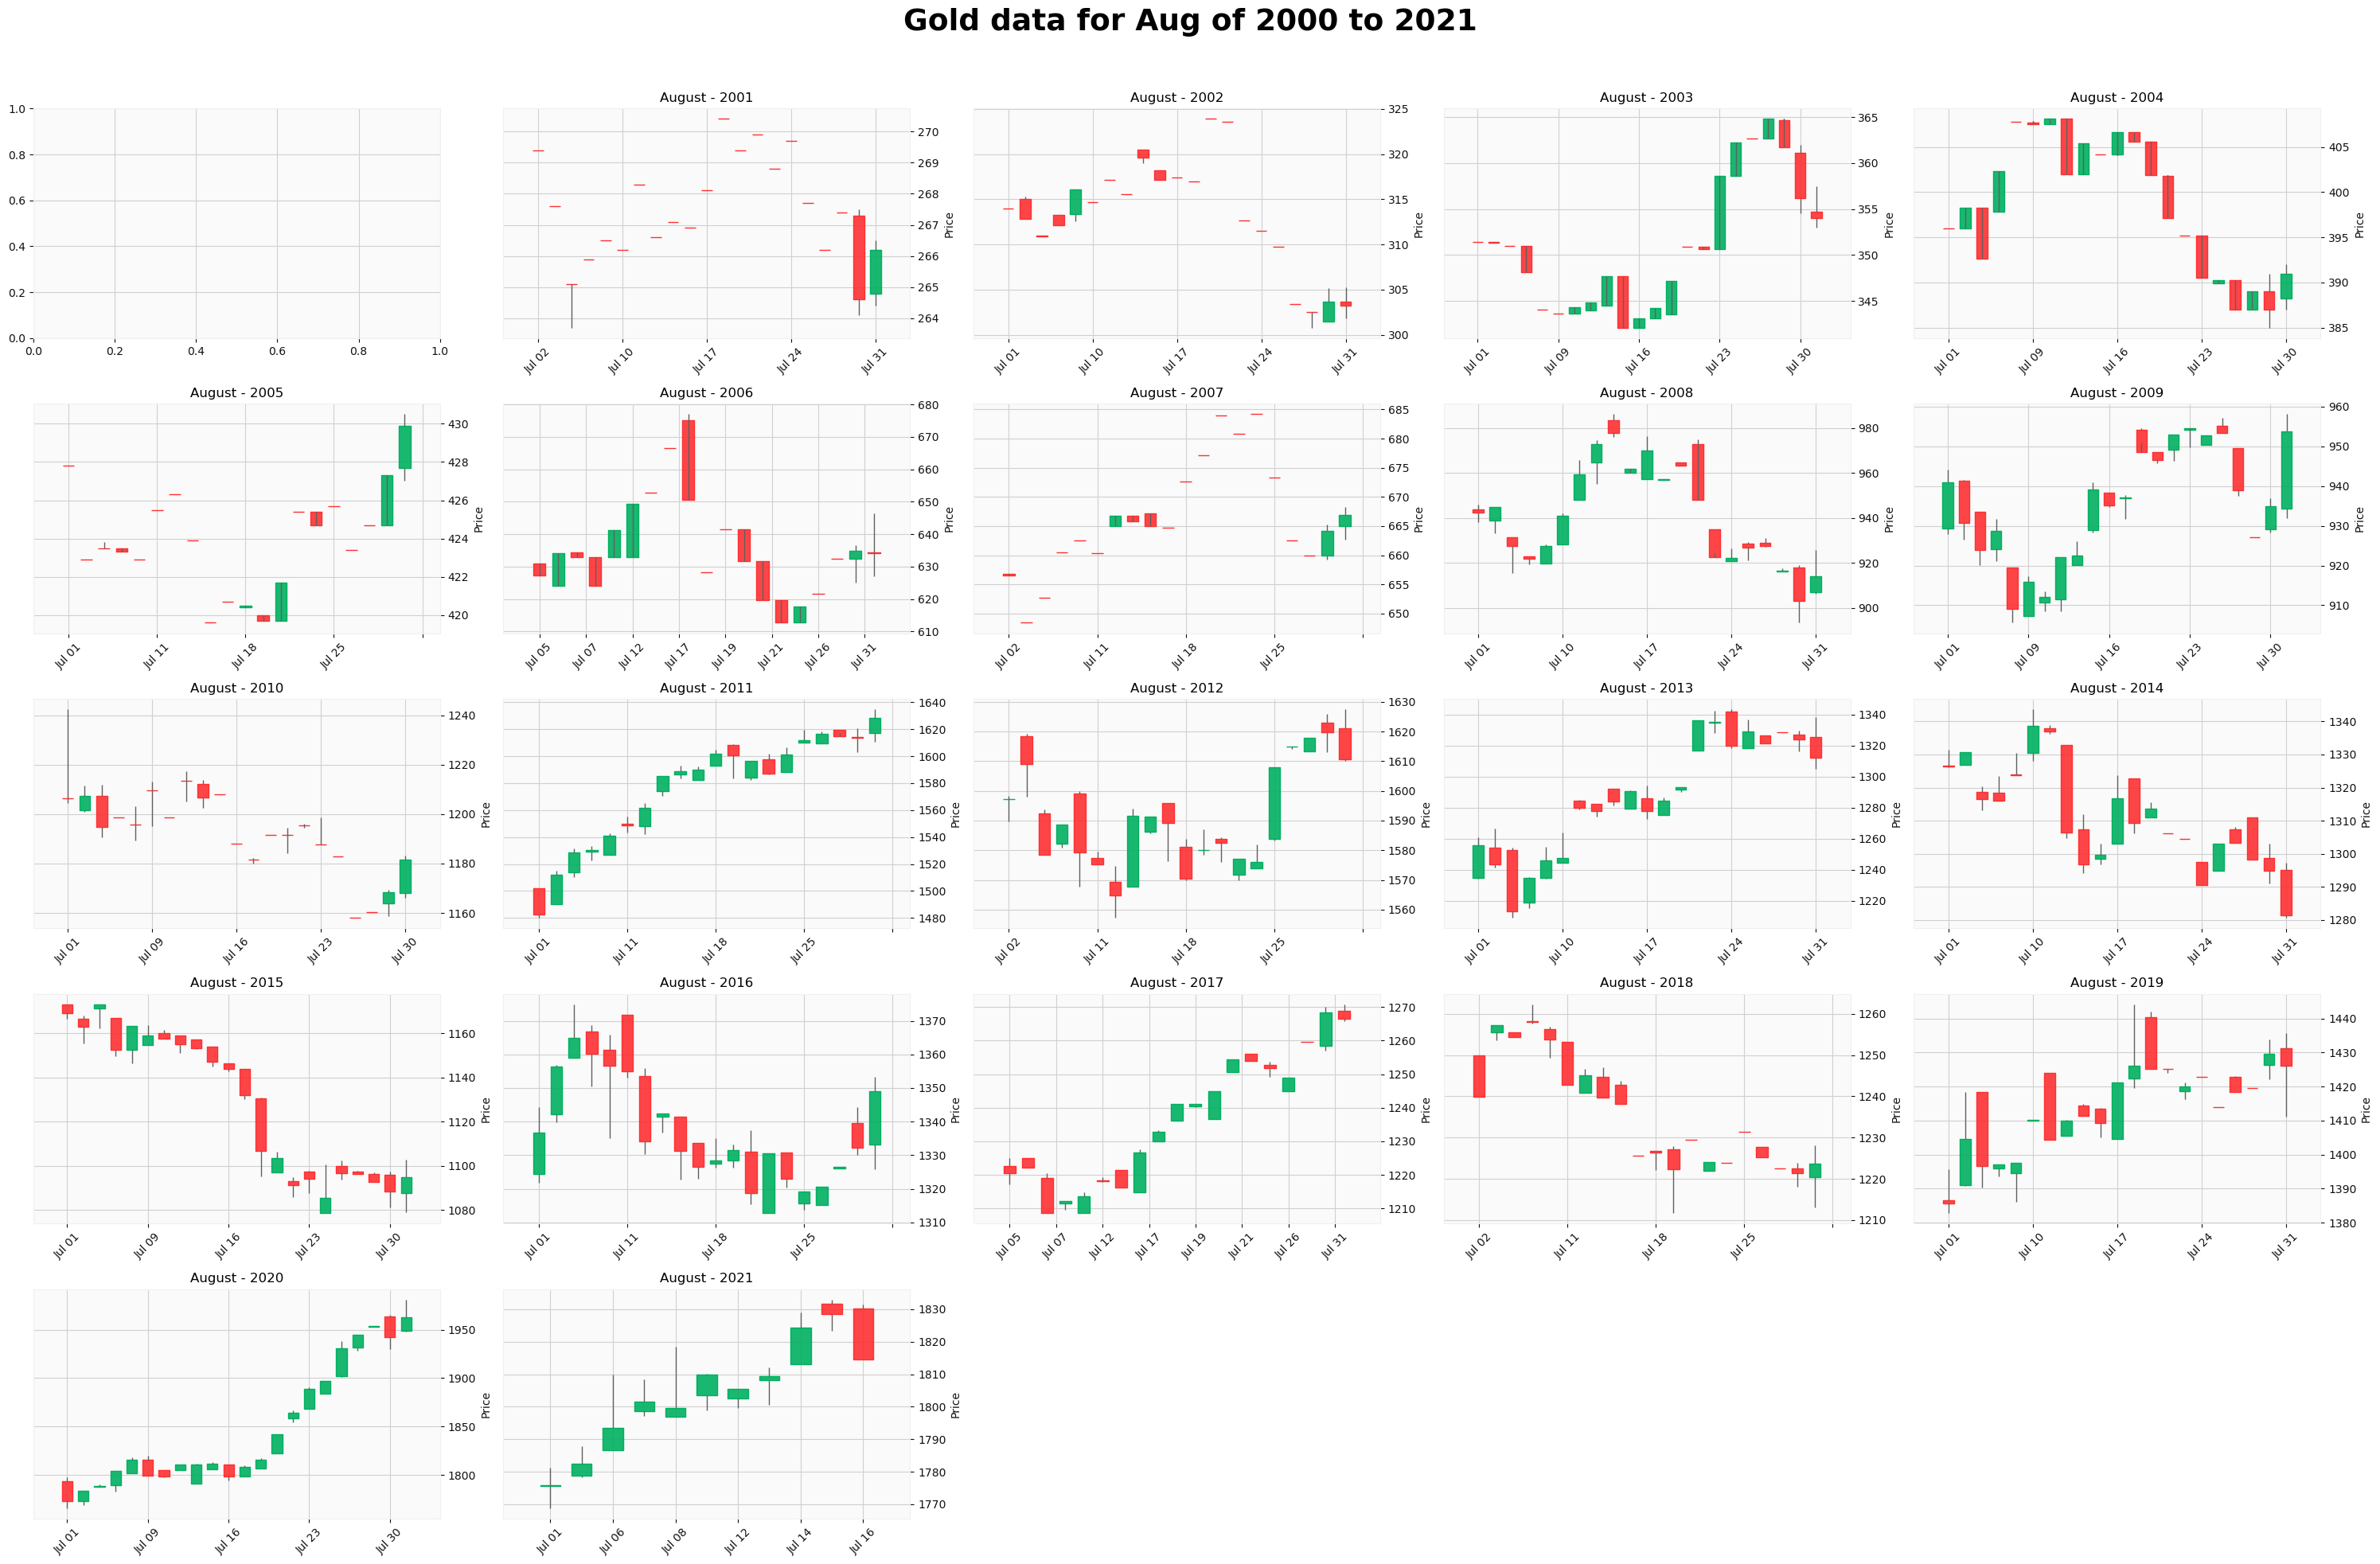

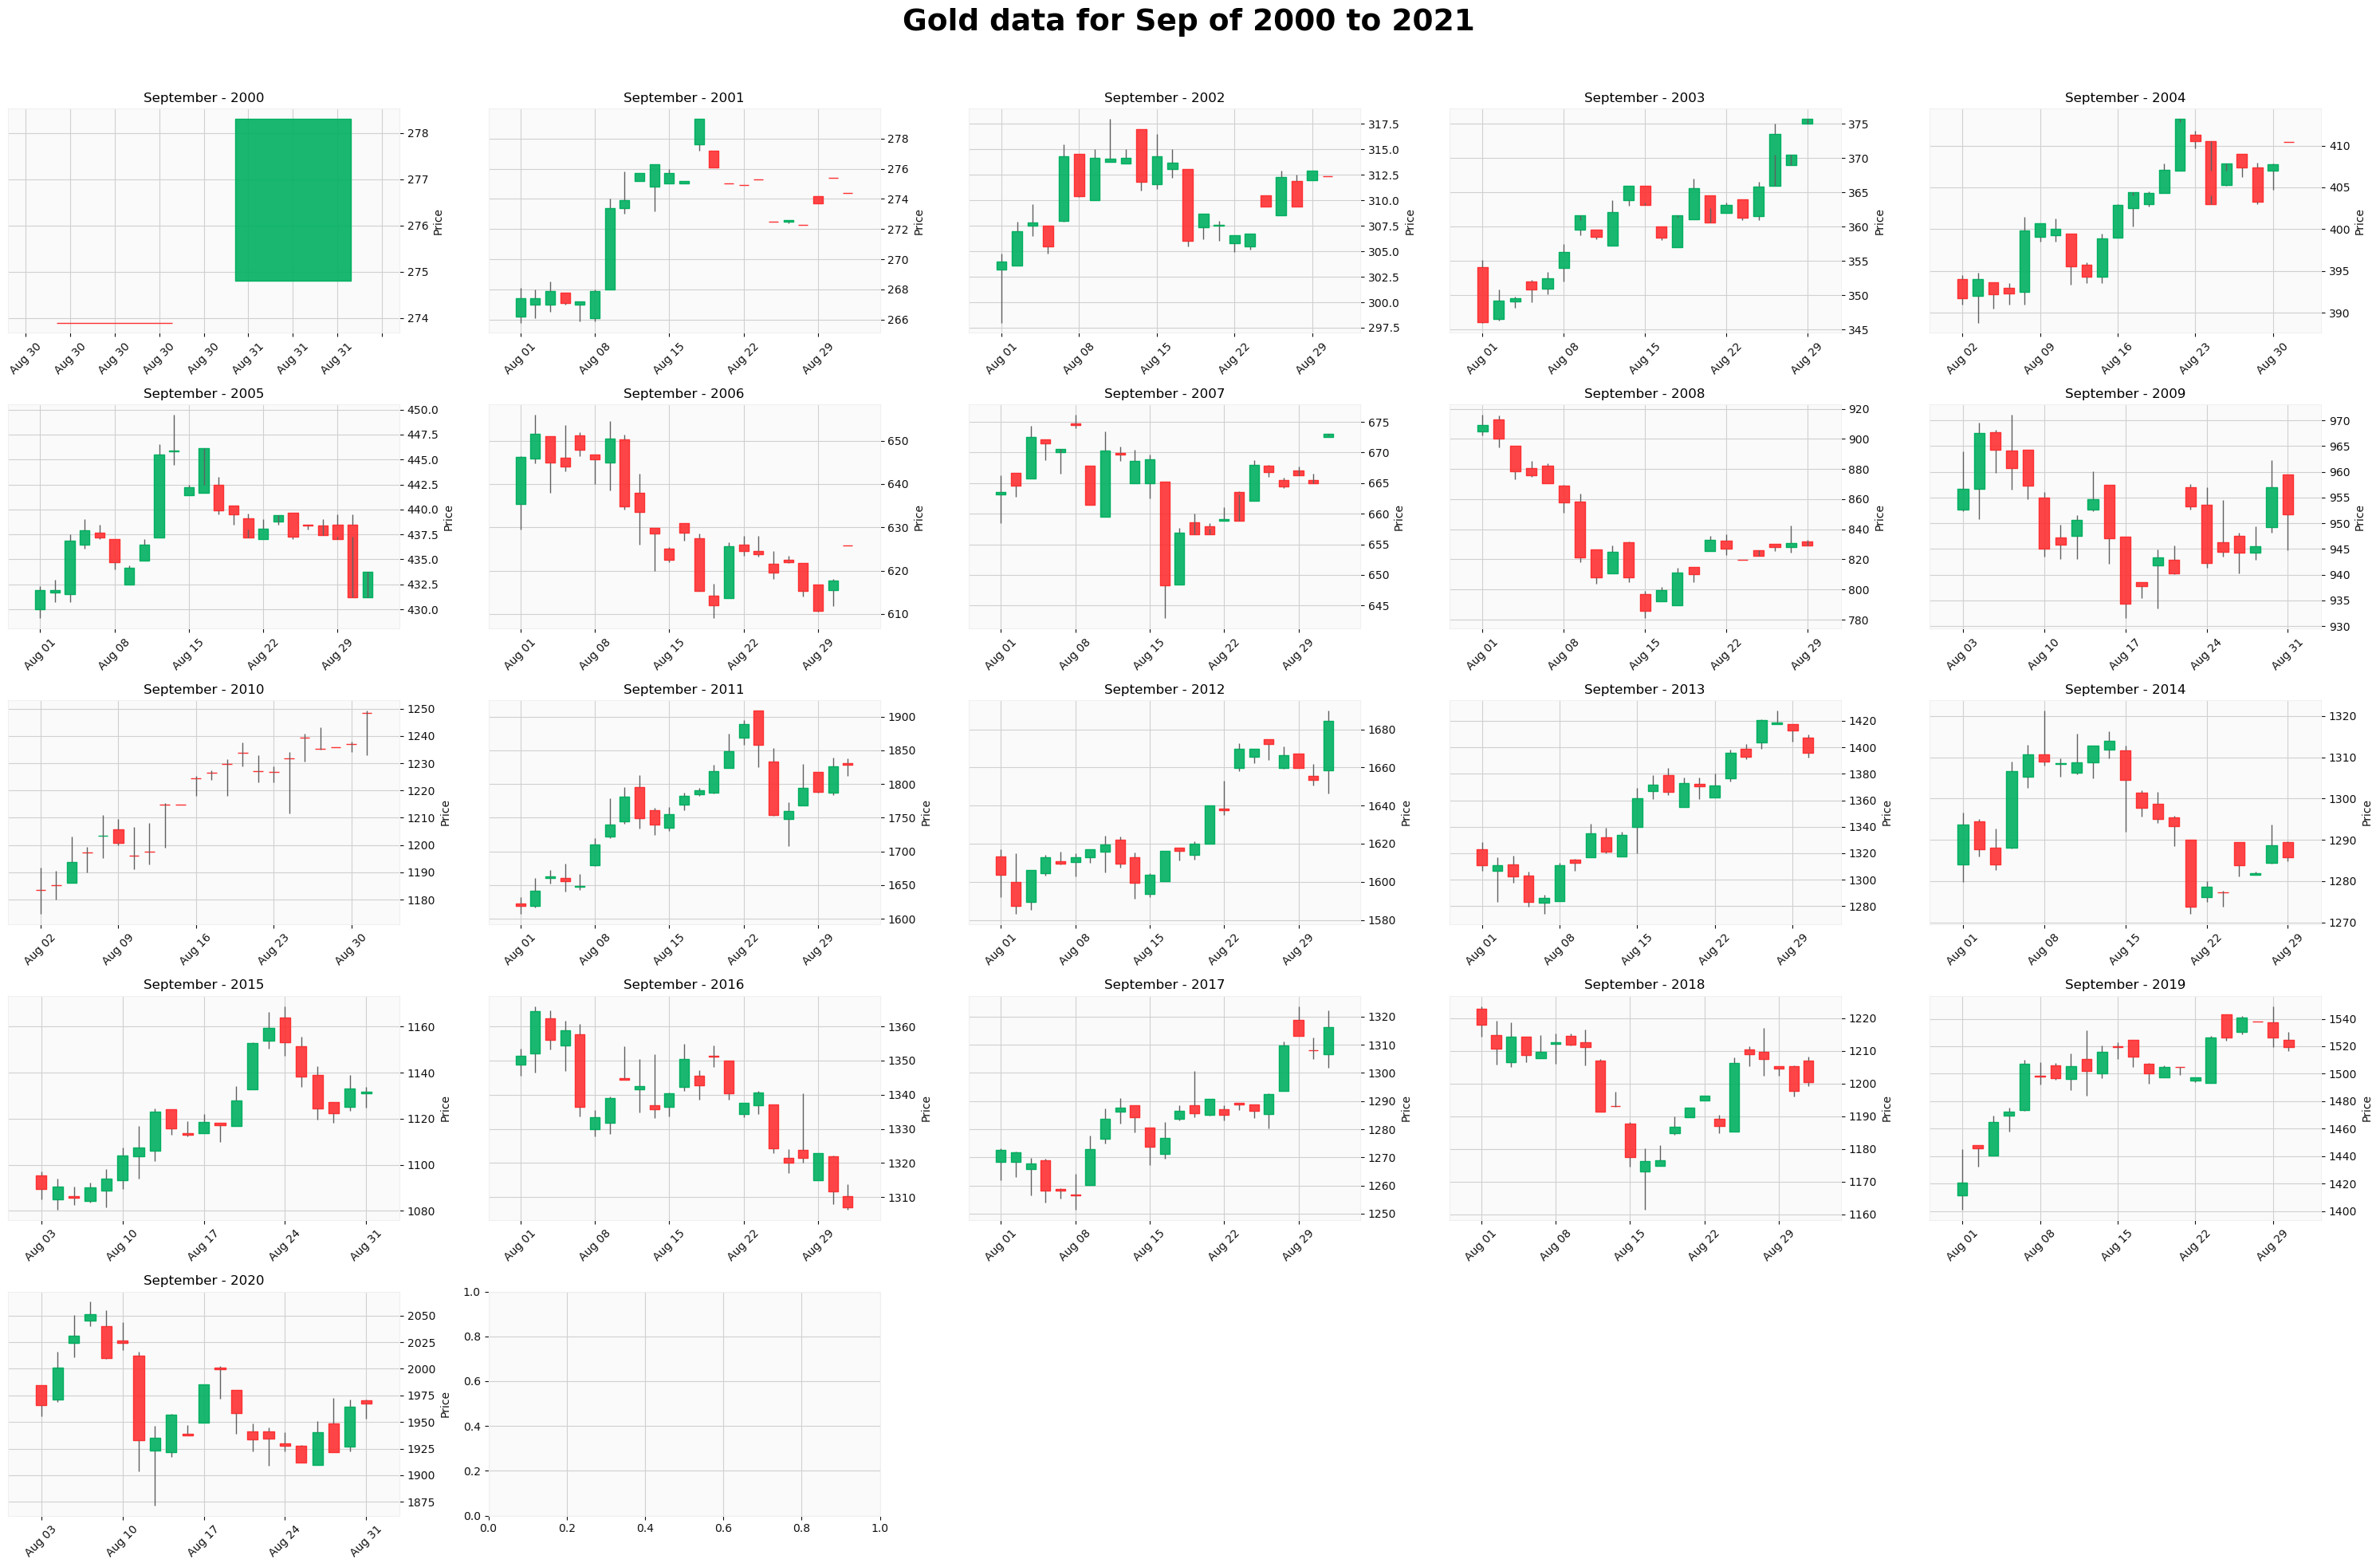

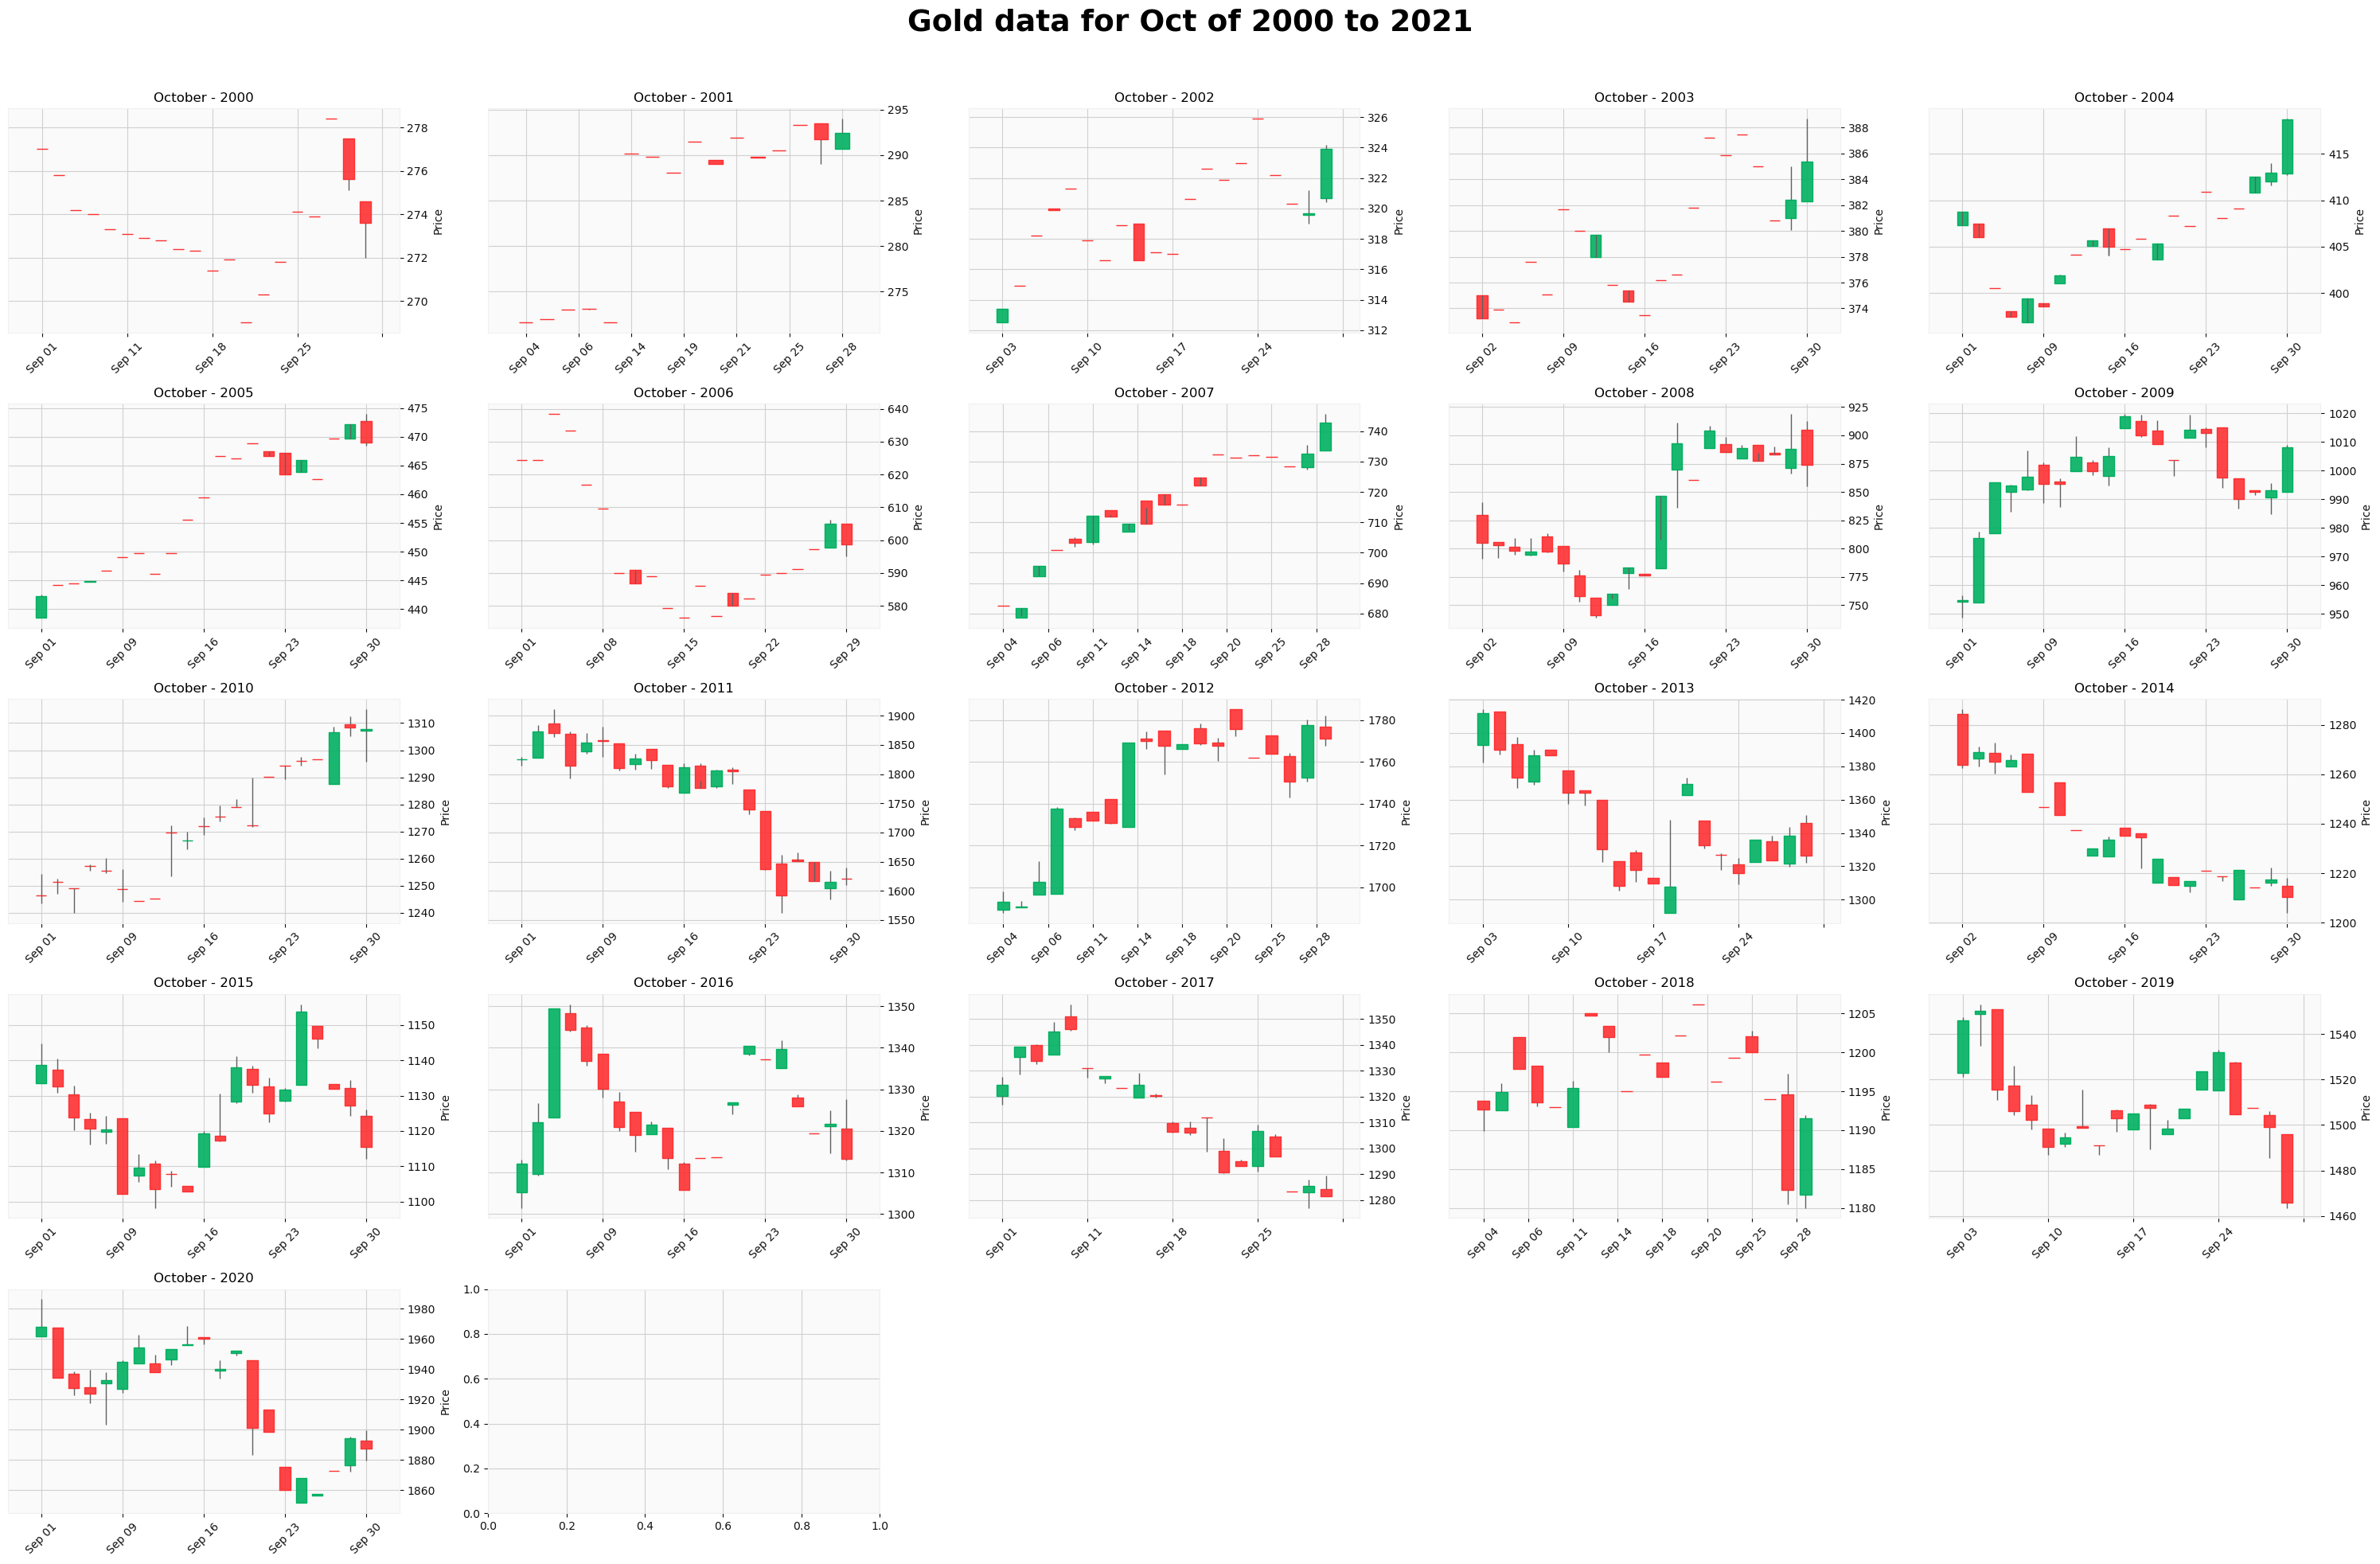

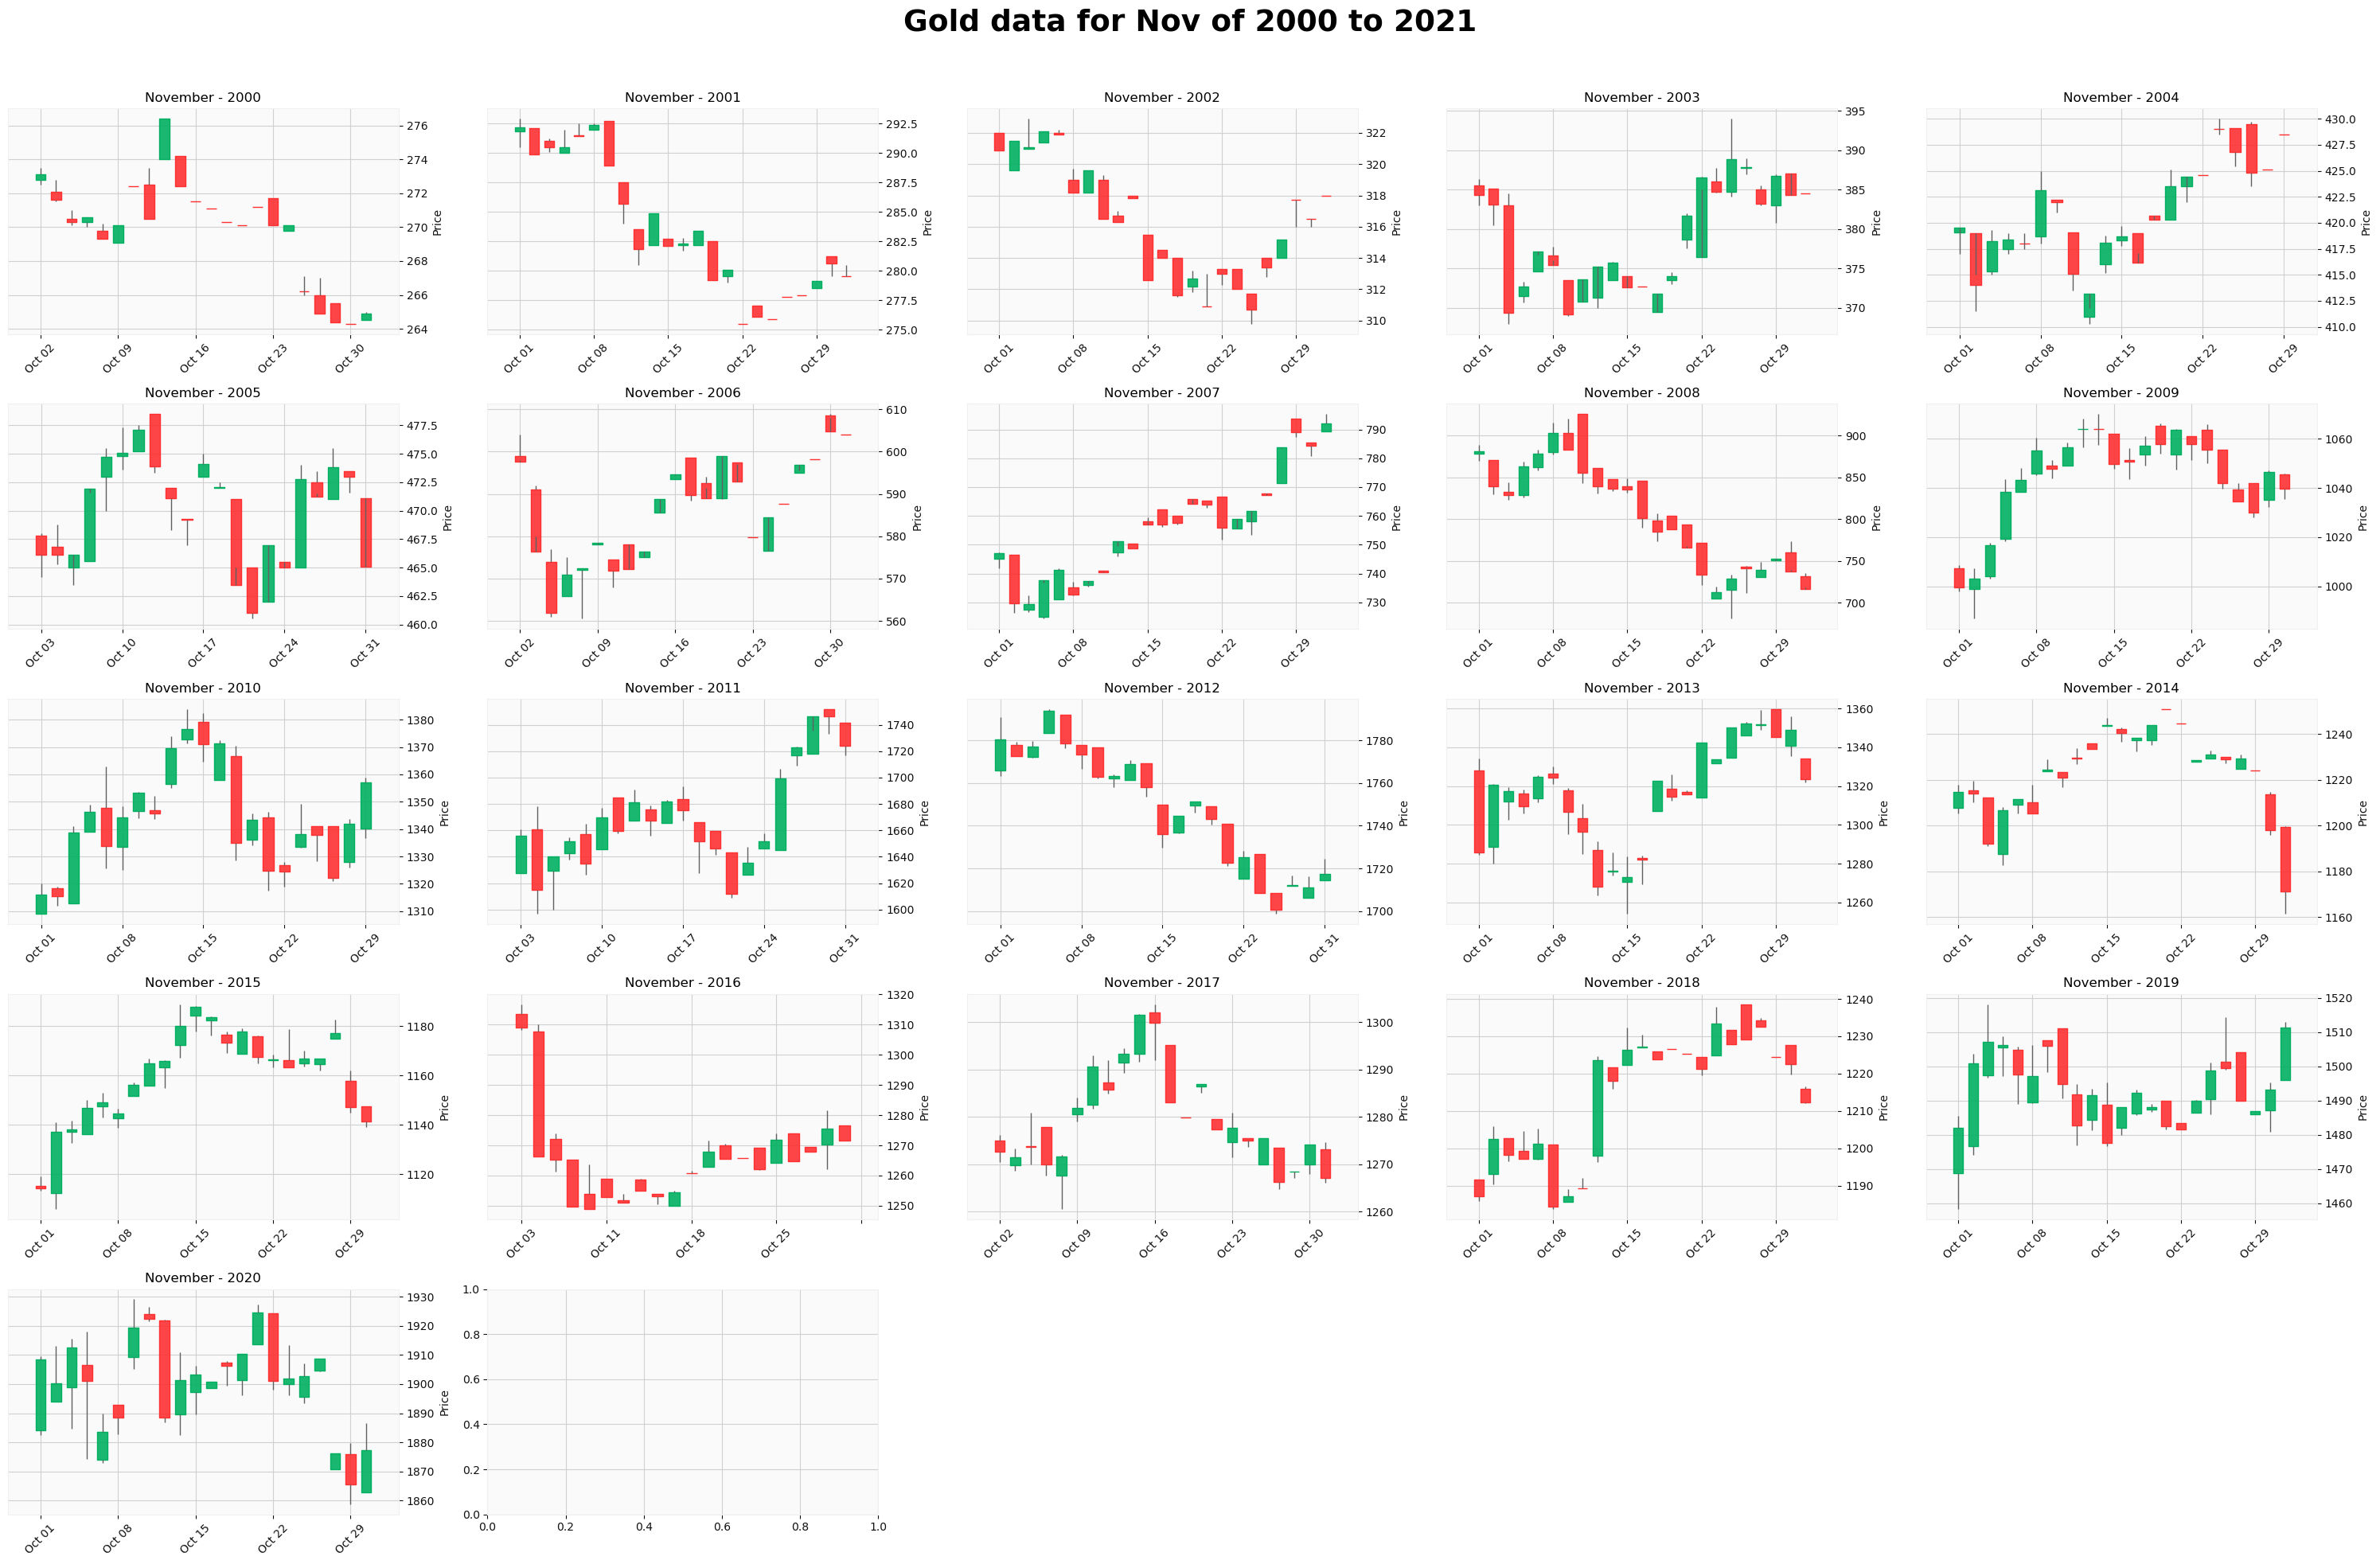

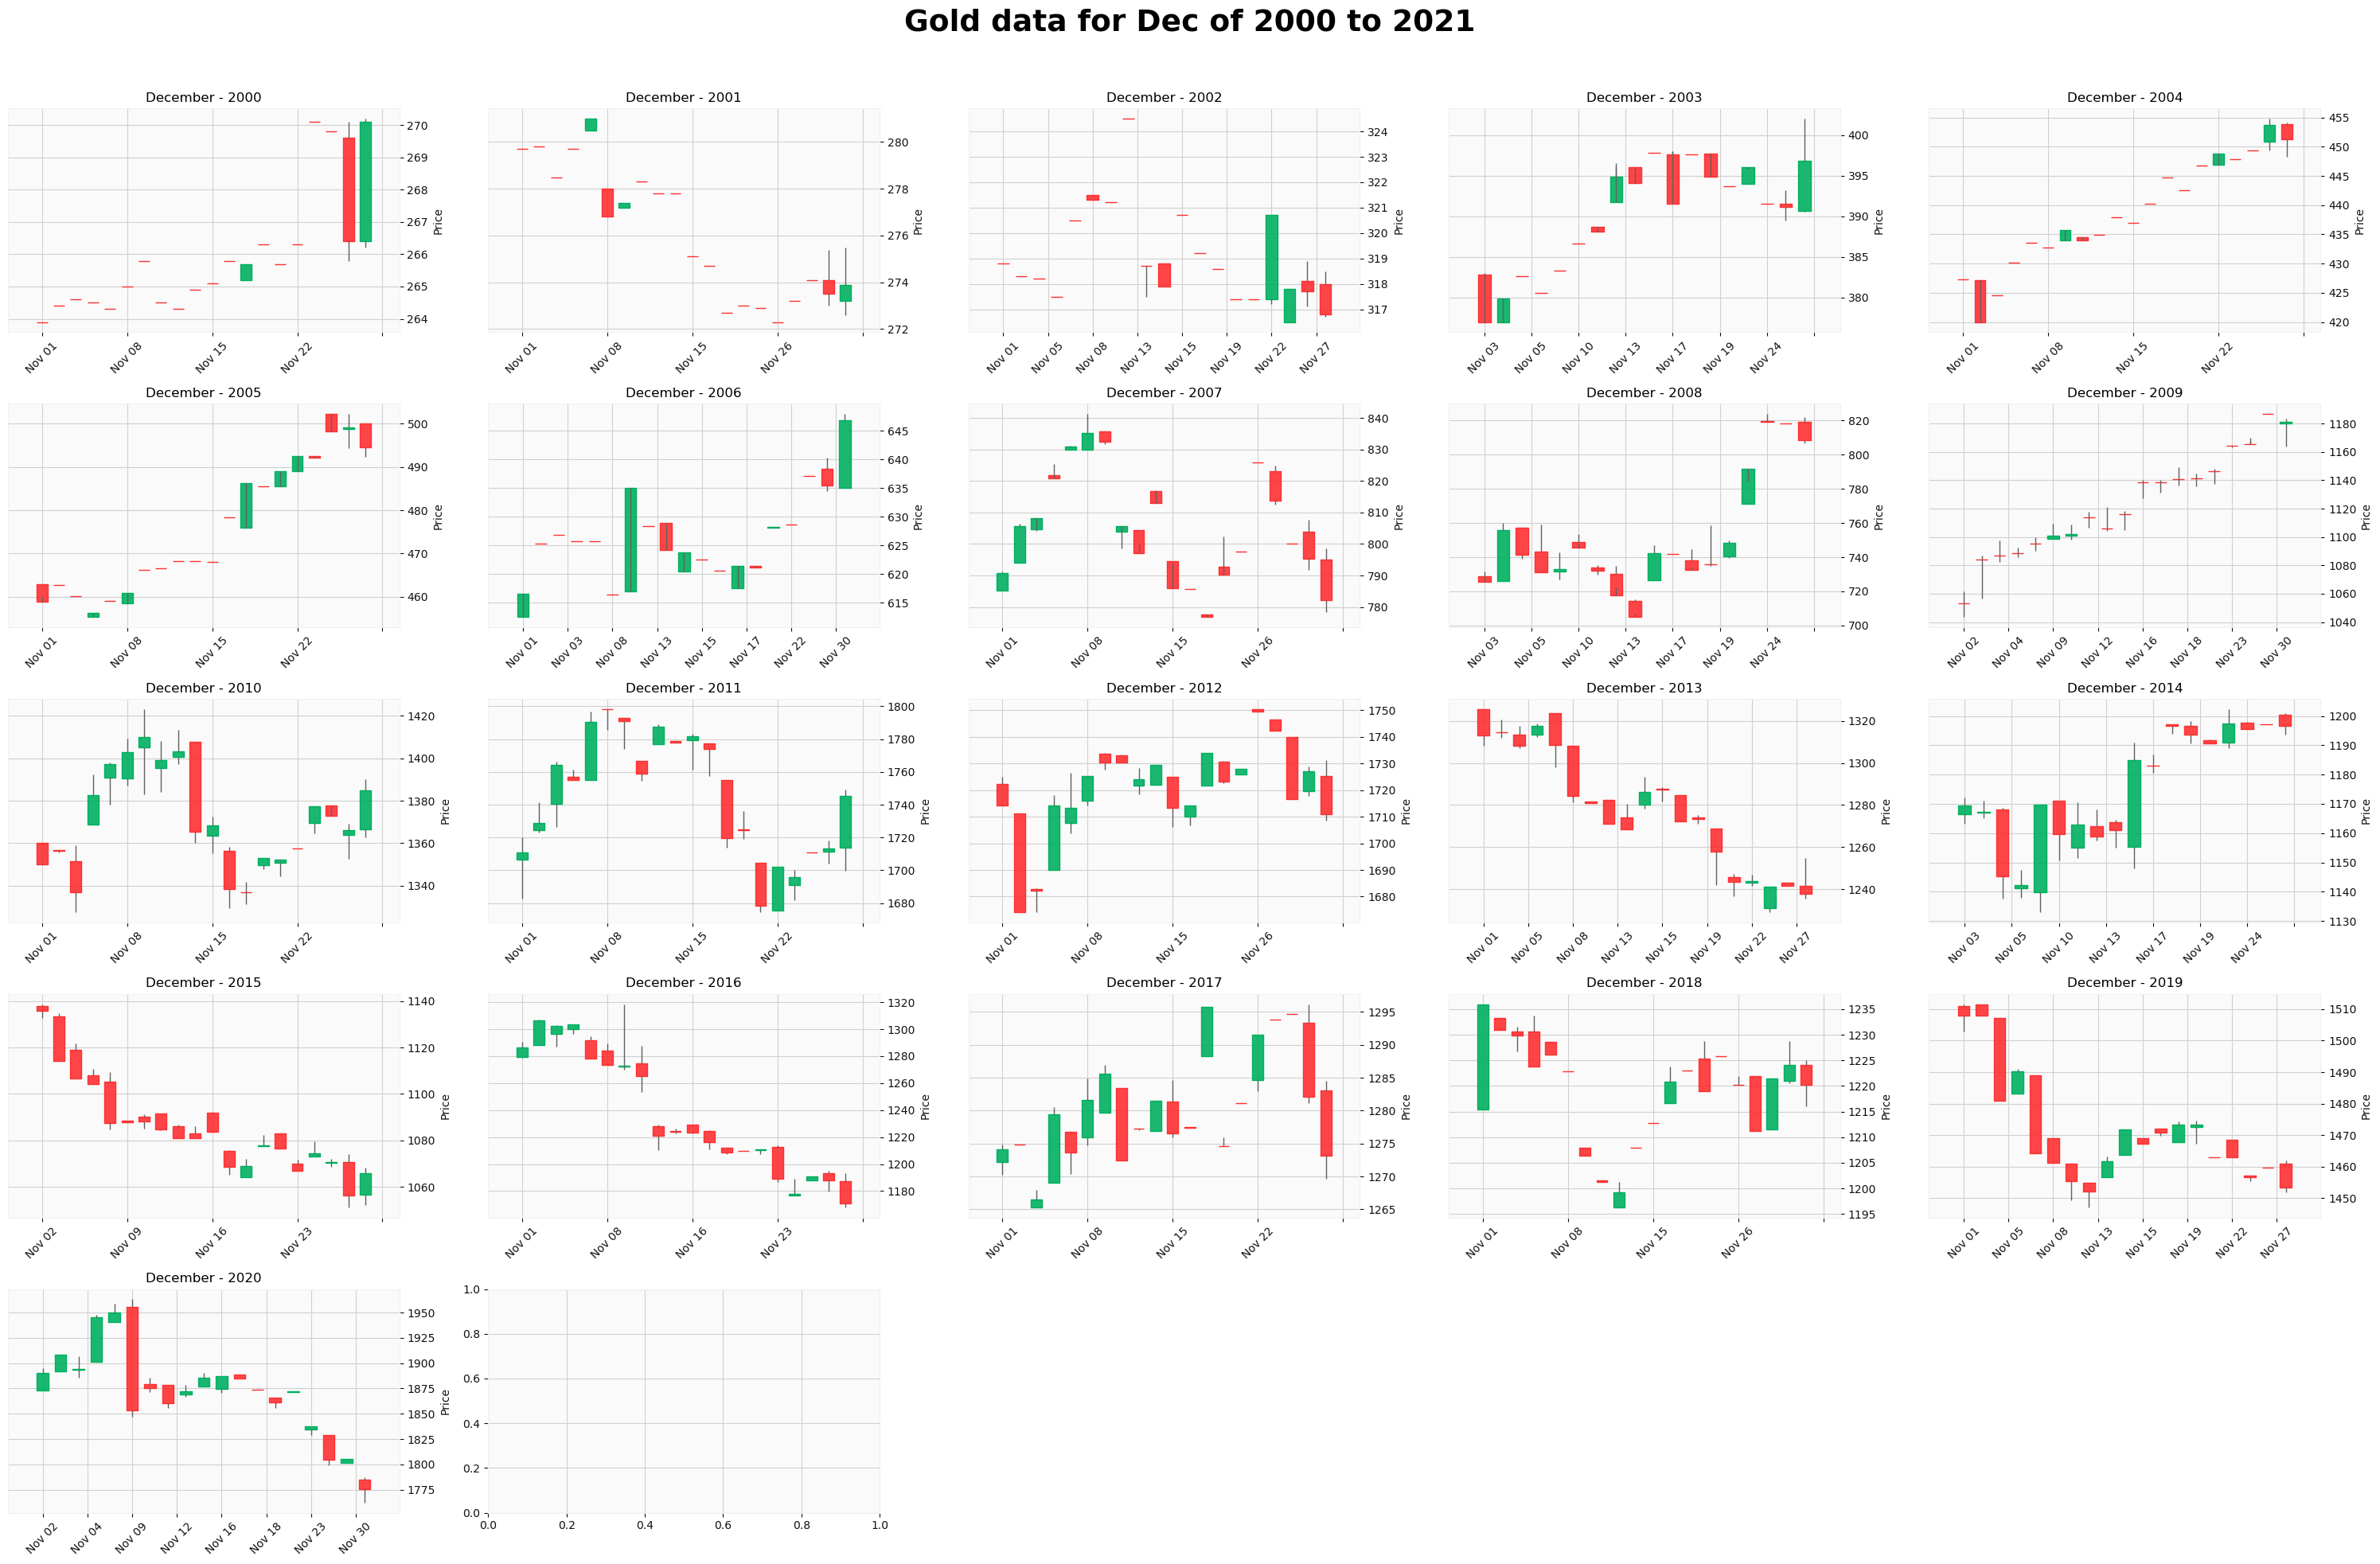

In [30]:
def plotter_sub_plots(df, month,df_name,month_name):
        
    rows = 5
    cols = 5
    months = {i: calendar.month_abbr[i + 1] for i in range(12)}
    fig, axes = plt.subplots(rows, cols, figsize=(30, 20))  
    fig.suptitle(f'{df_name} data for {months[month]} of 2000 to 2021', fontsize=27)  

    axes = axes.flatten()

    for i, year in enumerate(df.index.year.unique()):
        df_month = df[(df.index.month == month) & (df.index.year == year)]
        
        if not df_month.empty:
            mpf.plot(df_month, 
                    type='candle', 
                    style='yahoo', 
                    ax=axes[i])  
            axes[i].set_title(f'{month_name} - {year}')  

        
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout(rect=[0, 0, 1, 0.96])  
    plt.show()

months = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December"
]

for i in range(len(months)):
    plotter_sub_plots(df,i,"Gold",months[i])
    
    

### Variables of market: highest highs, lowest lows...etc.

#### Yearly variables

In [31]:
for year in df.index.year.unique():
    highest_high_per_year = df[df.index.year == year]['High'].max()
    lowest_low_per_year = df[df.index.year == year]['Low'].min()
    highest_low_per_year = df[df.index.year == year]['Low'].max()
    lowest_high_per_year = df[df.index.year == year]['Low'].min()

    print(f"\033[1m{year}\033[0m:\nHighest high: {highest_high_per_year}\nLowest low: {lowest_low_per_year}\nHighest low: {highest_low_per_year}\nLowest high:{lowest_high_per_year}")
    print("____________________________________________________________________________________________________")
    print("****************************************************************************************************")



2000:
Highest high: 278.399994
Lowest low: 263.899994
Highest low: 278.399994
Lowest high:263.899994
____________________________________________________________________________________________________
****************************************************************************************************
2001:
Highest high: 294.0
Lowest low: 255.0
Highest low: 293.299988
Lowest high:255.0
____________________________________________________________________________________________________
****************************************************************************************************
2002:
Highest high: 350.5
Lowest low: 278.100006
Highest low: 347.200012
Lowest high:278.100006
____________________________________________________________________________________________________
****************************************************************************************************
2003:
Highest high: 417.200012
Lowest low: 319.299988
Highest low: 417.200012
Lowest high:319.299988
__________

#### Monthly variables

In [32]:
for year in df.index.year.unique():
    for month in df.index.month.unique():
        highest_high_per_year = df[(df.index.year == year) & (df.index.month == month)]['High'].max()
        lowest_low_per_year = df[(df.index.year == year) & (df.index.month == month)]['Low'].min()
        highest_low_per_year = df[(df.index.year == year) & (df.index.month == month)]['Low'].max()
        lowest_high_per_year = df[(df.index.year == year) & (df.index.month == month)]['Low'].min()

        print(f"\033[1m{calendar.month_name[month]} - {year}:\033[0m\nHighest high: {highest_high_per_year}\nLowest low: {lowest_low_per_year}\nHighest low: {highest_low_per_year}\nLowest high:{lowest_high_per_year}")
        print("____________________________________________________________________________________________________")
        print("****************************************************************************************************")



August - 2000:
Highest high: 278.299988
Lowest low: 273.899994
Highest low: 274.799988
Lowest high:273.899994
____________________________________________________________________________________________________
****************************************************************************************************
September - 2000:
Highest high: 278.399994
Lowest low: 269.0
Highest low: 278.399994
Lowest high:269.0
____________________________________________________________________________________________________
****************************************************************************************************
October - 2000:
Highest high: 276.399994
Lowest low: 264.299988
Highest low: 274.0
Lowest high:264.299988
____________________________________________________________________________________________________
****************************************************************************************************
November - 2000:
Highest high: 270.200012
Lowest low: 263.899994
Highest lo

In [33]:
df[(df.index.year == 2001)].index.month.unique()

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int32', name='Date')

### Support Ressistance on monthly charts using different approaches

#### Support-Ressistance using rolling max and min 

<Figure size 640x480 with 0 Axes>

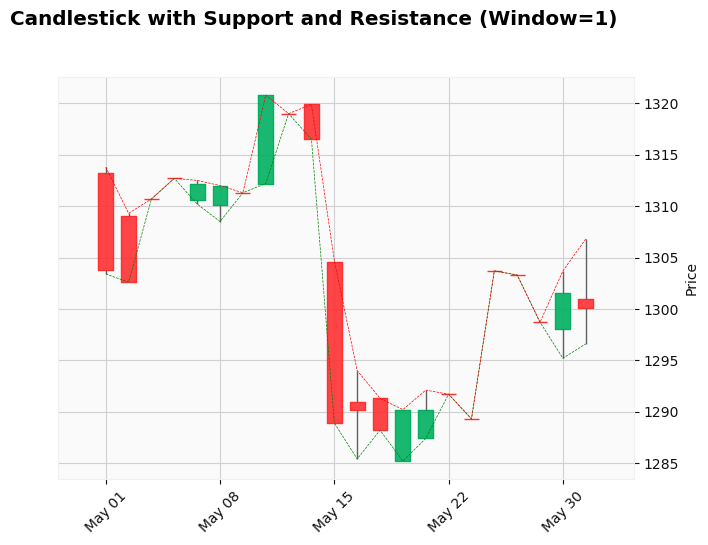

<Figure size 640x480 with 0 Axes>

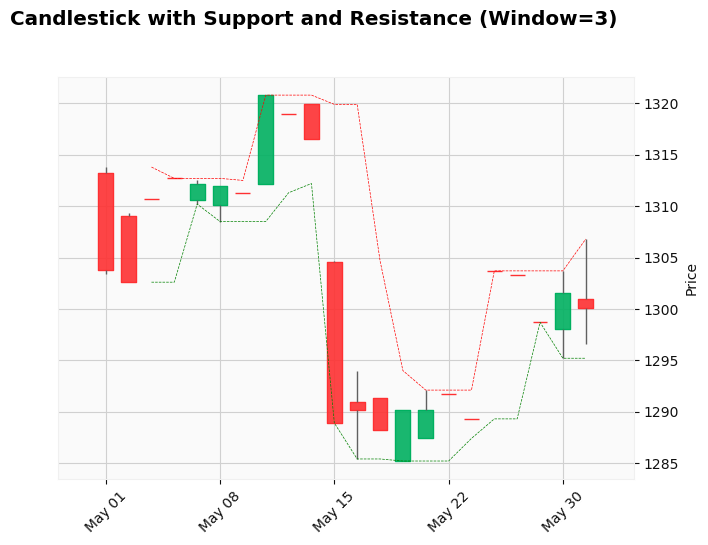

<Figure size 640x480 with 0 Axes>

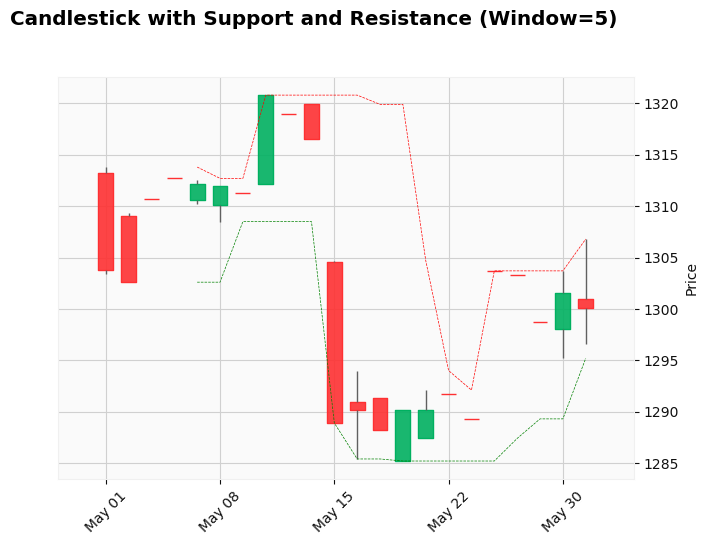

<Figure size 640x480 with 0 Axes>

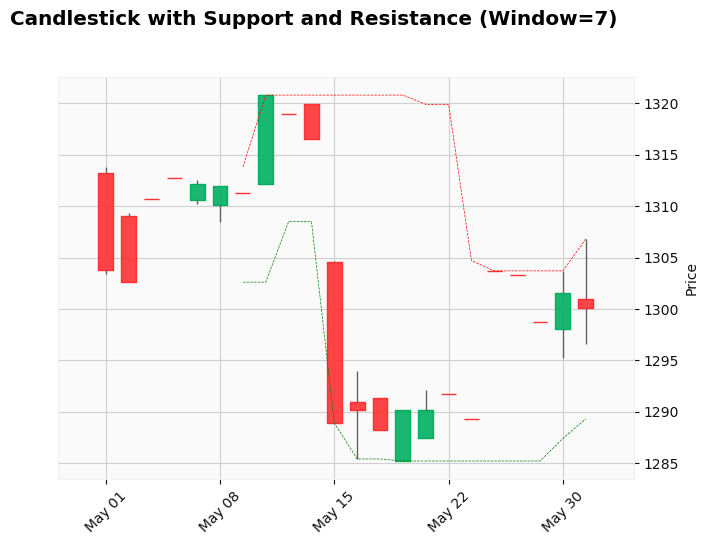

<Figure size 640x480 with 0 Axes>

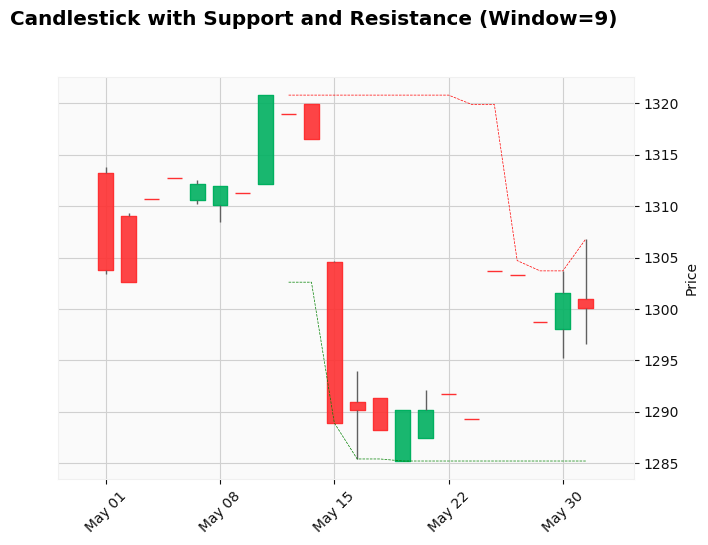

<Figure size 640x480 with 0 Axes>

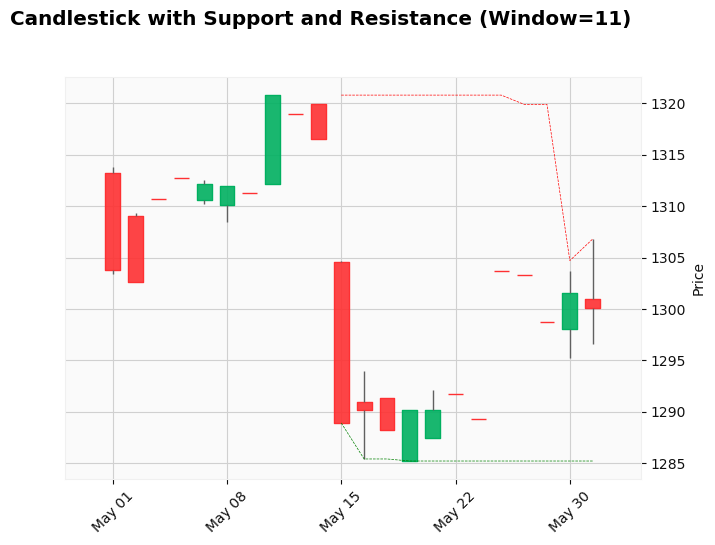

<Figure size 640x480 with 0 Axes>

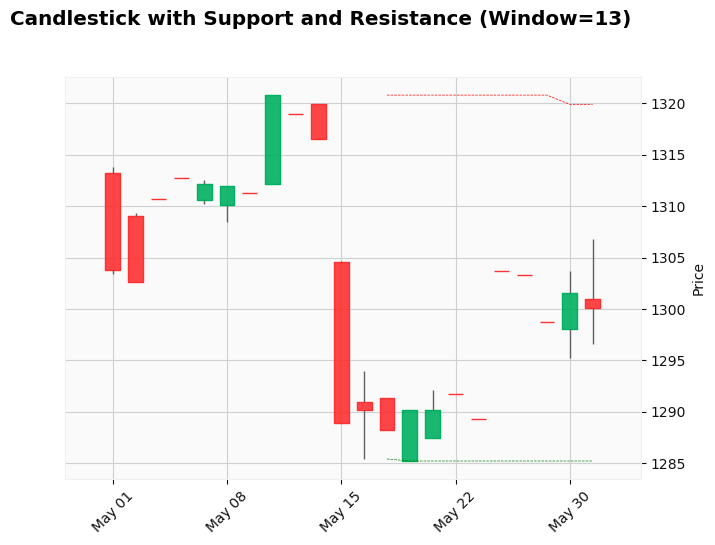

<Figure size 640x480 with 0 Axes>

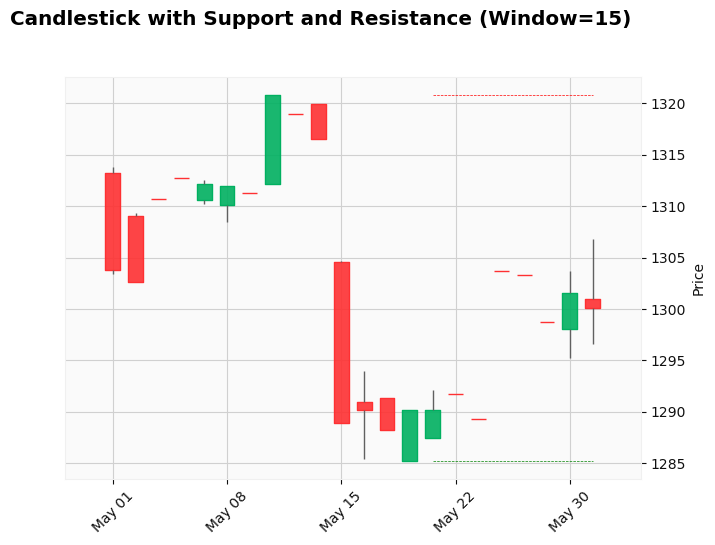

<Figure size 640x480 with 0 Axes>

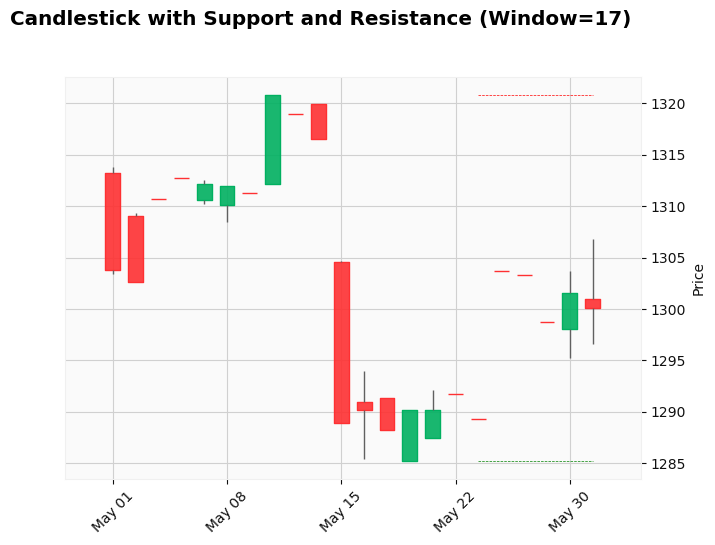

<Figure size 640x480 with 0 Axes>

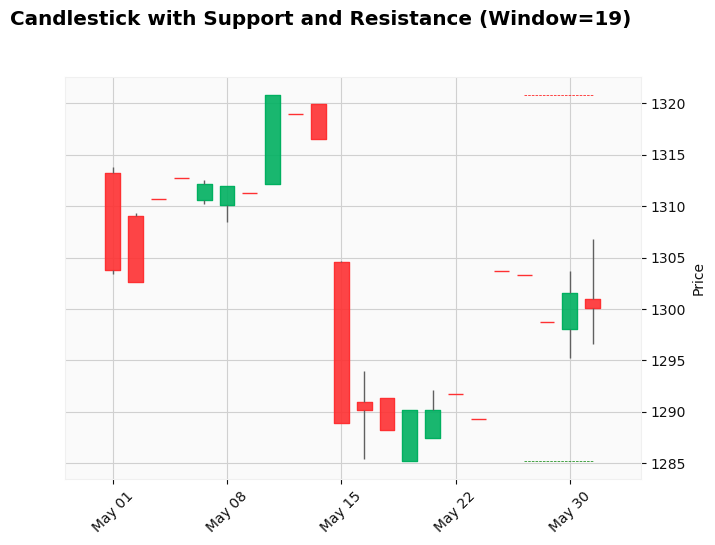

In [34]:


def calculate_support_resistance(df, window):
    lows = df['Low'].rolling(window=window).min()
    highs = df['High'].rolling(window=window).max()
    return lows, highs

def plot_support_resistance(df, start_year, start_month, window_start=1, window_end=20, step=2):
    df_filtered = df[(df.index.year == start_year) & (df.index.month == start_month)].copy()
    
    for window in range(window_start, window_end + 1, step):
        support, resistance = calculate_support_resistance(df_filtered, window)
        
        df_filtered.loc[:, 'Support'] = support
        df_filtered.loc[:, 'Resistance'] = resistance

        ap = [
            mpf.make_addplot(df_filtered['Support'], color='green', linestyle='--', width=0.5),
            mpf.make_addplot(df_filtered['Resistance'], color='red', linestyle='--', width=0.5)
        ]

        plt.figure()
        mpf.plot(df_filtered, type='candle', addplot=ap, style='yahoo',
                 title=f'Candlestick with Support and Resistance (Window={window})')
        plt.show()



plot_support_resistance(df, start_year=2018, start_month=5, window_start=1, window_end=20, step=2)


#### Pivot points support and ressistance plotting

C:\Users\moham\AppData\Local\Temp\ipykernel_11388\2383725871.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Pivot'] = (df['High'] + df['Low'] + df['Close']) / 3
C:\Users\moham\AppData\Local\Temp\ipykernel_11388\2383725871.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['R1'] = 2 * df['Pivot'] - df['Low']
C:\Users\moham\AppData\Local\Temp\ipykernel_11388\2383725871.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

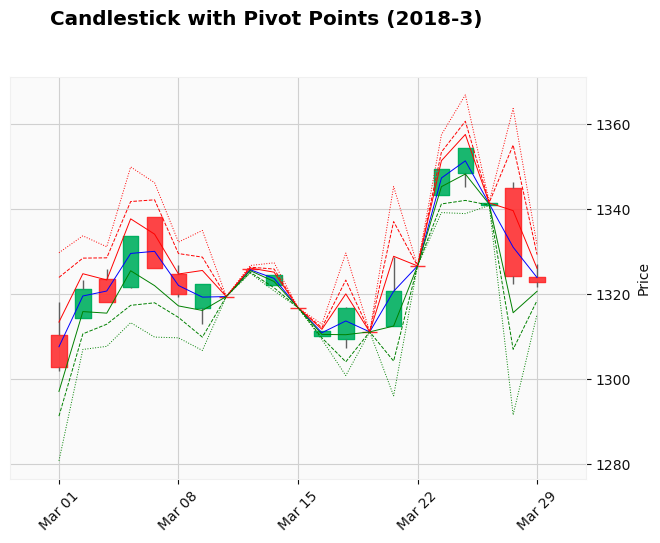

In [35]:

def calculate_pivot_points(df):
    df['Pivot'] = (df['High'] + df['Low'] + df['Close']) / 3
    
    df['R1'] = 2 * df['Pivot'] - df['Low']
    df['S1'] = 2 * df['Pivot'] - df['High']
    df['R2'] = df['Pivot'] + (df['High'] - df['Low'])
    df['S2'] = df['Pivot'] - (df['High'] - df['Low'])
    df['R3'] = df['High'] + 2 * (df['Pivot'] - df['Low'])
    df['S3'] = df['Low'] - 2 * (df['High'] - df['Pivot'])
    
    return df

def plot_with_pivot_points(df, start_year, start_month):
    df_filtered = df.loc[(df.index.year == start_year) & (df.index.month == start_month)]
    df_filtered = calculate_pivot_points(df_filtered)

    ap = [
        mpf.make_addplot(df_filtered['Pivot'], color='blue', linestyle='-', width=0.7),
        mpf.make_addplot(df_filtered['R1'], color='red', linestyle='-', width=0.7),
        mpf.make_addplot(df_filtered['S1'], color='green', linestyle='-', width=0.7),
        mpf.make_addplot(df_filtered['R2'], color='red', linestyle='--', width=0.7),
        mpf.make_addplot(df_filtered['S2'], color='green', linestyle='--', width=0.7),
        mpf.make_addplot(df_filtered['R3'], color='red', linestyle=':', width=0.7),
        mpf.make_addplot(df_filtered['S3'], color='green', linestyle=':', width=0.7)
    ]

    mpf.plot(df_filtered, type='candle', addplot=ap, style='yahoo',
             title=f'Candlestick with Pivot Points ({start_year}-{start_month})')



plot_with_pivot_points(df, start_year=2018, start_month=3)


In [36]:
df['Simple moving average - open'] = df['Open'].rolling(window=3).mean()
df['Simple moving average - close'] = df['Close'].rolling(window=3).mean() 
df['Simple moving average - high'] = df['Open'].rolling(window=3).mean()
df['Simple moving average - low'] = df['Low'].rolling(window=3).mean()
df['Simple moving average - adj close'] = df['Adj Close'].rolling(window=3).mean()

In [37]:
date_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')
df = df.reindex(date_range)
df.index.name = 'Date'
df

Open         High          Low        Close    Adj Close  \
Date                                                                          
2000-08-30   273.899994   273.899994   273.899994   273.899994   273.899994   
2000-08-31   274.799988   278.299988   274.799988   278.299988   278.299988   
2000-09-01   277.000000   277.000000   277.000000   277.000000   277.000000   
2000-09-02          NaN          NaN          NaN          NaN          NaN   
2000-09-03          NaN          NaN          NaN          NaN          NaN   
...                 ...          ...          ...          ...          ...   
2021-07-12  1802.599976  1805.500000  1799.500000  1805.500000  1805.500000   
2021-07-13  1808.099976  1812.000000  1800.599976  1809.400024  1809.400024   
2021-07-14  1813.099976  1829.000000  1813.099976  1824.300049  1824.300049   
2021-07-15  1831.599976  1833.000000  1823.400024  1828.400024  1828.400024   
2021-07-16  1830.099976  1831.400024  1814.500000  1814.500000  1814.500000   

            Volume  Simple moving average - open  \
Date                                               
2000-08-30     0.0                           NaN   
2000-08-31     0.0                           NaN   
2000-09-01     0.0                    275.233327   
2000-09-02     NaN                           NaN   
2000-09-03     NaN                           NaN   
...            ...                           ...   
2021-07-12   218.0                   1801.066651   
2021-07-13   147.0                   1804.766643   
2021-07-14   707.0                   1807.933309   
2021-07-15    99.0                   1817.599976   
2021-07-16    99.0                   1824.933309   

            Simple moving average - close  Simple moving average - high  \
Date                                                                      
2000-08-30                            NaN                           NaN   
2000-08-31                            NaN                           NaN   
2000-09-01                     276.399994                    275.233327   
2000-09-02                            NaN                           NaN   
2000-09-03                            NaN                           NaN   
...                                   ...                           ...   
2021-07-12                    1805.033325                   1801.066651   
2021-07-13                    1808.300008                   1804.766643   
2021-07-14                    1813.066691                   1807.933309   
2021-07-15                    1820.700032                   1817.599976   
2021-07-16                    1822.400024                   1824.933309   

            Simple moving average - low  Simple moving average - adj close  
Date                                                                        
2000-08-30                          NaN                                NaN  
2000-08-31                          NaN                                NaN  
2000-09-01                   275.233327                         276.399994  
2000-09-02                          NaN                                NaN  
2000-09-03                          NaN                                NaN  
...                                 ...                                ...  
2021-07-12                  1798.433350                        1805.033325  
2021-07-13                  1799.633342                        1808.300008  
2021-07-14                  1804.399984                        1813.066691  
2021-07-15                  1812.366659                        1820.700032  
2021-07-16                  1817.000000                        1822.400024  

[7626 rows x 11 columns]

### Feature engineering - adding features

In [38]:
for col in df.columns:
    df[col] = df[col].interpolate()

df

Open         High          Low        Close    Adj Close  \
Date                                                                          
2000-08-30   273.899994   273.899994   273.899994   273.899994   273.899994   
2000-08-31   274.799988   278.299988   274.799988   278.299988   278.299988   
2000-09-01   277.000000   277.000000   277.000000   277.000000   277.000000   
2000-09-02   276.699997   276.699997   276.699997   276.699997   276.699997   
2000-09-03   276.399994   276.399994   276.399994   276.399994   276.399994   
...                 ...          ...          ...          ...          ...   
2021-07-12  1802.599976  1805.500000  1799.500000  1805.500000  1805.500000   
2021-07-13  1808.099976  1812.000000  1800.599976  1809.400024  1809.400024   
2021-07-14  1813.099976  1829.000000  1813.099976  1824.300049  1824.300049   
2021-07-15  1831.599976  1833.000000  1823.400024  1828.400024  1828.400024   
2021-07-16  1830.099976  1831.400024  1814.500000  1814.500000  1814.500000   

            Volume  Simple moving average - open  \
Date                                               
2000-08-30     0.0                           NaN   
2000-08-31     0.0                           NaN   
2000-09-01     0.0                    275.233327   
2000-09-02     0.5                    275.391660   
2000-09-03     1.0                    275.549993   
...            ...                           ...   
2021-07-12   218.0                   1801.066651   
2021-07-13   147.0                   1804.766643   
2021-07-14   707.0                   1807.933309   
2021-07-15    99.0                   1817.599976   
2021-07-16    99.0                   1824.933309   

            Simple moving average - close  Simple moving average - high  \
Date                                                                      
2000-08-30                            NaN                           NaN   
2000-08-31                            NaN                           NaN   
2000-09-01                     276.399994                    275.233327   
2000-09-02                     276.558327                    275.391660   
2000-09-03                     276.716660                    275.549993   
...                                   ...                           ...   
2021-07-12                    1805.033325                   1801.066651   
2021-07-13                    1808.300008                   1804.766643   
2021-07-14                    1813.066691                   1807.933309   
2021-07-15                    1820.700032                   1817.599976   
2021-07-16                    1822.400024                   1824.933309   

            Simple moving average - low  Simple moving average - adj close  
Date                                                                        
2000-08-30                          NaN                                NaN  
2000-08-31                          NaN                                NaN  
2000-09-01                   275.233327                         276.399994  
2000-09-02                   275.391660                         276.558327  
2000-09-03                   275.549993                         276.716660  
...                                 ...                                ...  
2021-07-12                  1798.433350                        1805.033325  
2021-07-13                  1799.633342                        1808.300008  
2021-07-14                  1804.399984                        1813.066691  
2021-07-15                  1812.366659                        1820.700032  
2021-07-16                  1817.000000                        1822.400024  

[7626 rows x 11 columns]

In [39]:
df['Close-Open'] = df['Close'] - df['Open']
df['High-Low'] = df['High'] - df['Low']

df['Lag_1'] = df['Close'].shift(1)
df['Lag_2'] = df['Close'].shift(2)

In [40]:
df

Open         High          Low        Close    Adj Close  \
Date                                                                          
2000-08-30   273.899994   273.899994   273.899994   273.899994   273.899994   
2000-08-31   274.799988   278.299988   274.799988   278.299988   278.299988   
2000-09-01   277.000000   277.000000   277.000000   277.000000   277.000000   
2000-09-02   276.699997   276.699997   276.699997   276.699997   276.699997   
2000-09-03   276.399994   276.399994   276.399994   276.399994   276.399994   
...                 ...          ...          ...          ...          ...   
2021-07-12  1802.599976  1805.500000  1799.500000  1805.500000  1805.500000   
2021-07-13  1808.099976  1812.000000  1800.599976  1809.400024  1809.400024   
2021-07-14  1813.099976  1829.000000  1813.099976  1824.300049  1824.300049   
2021-07-15  1831.599976  1833.000000  1823.400024  1828.400024  1828.400024   
2021-07-16  1830.099976  1831.400024  1814.500000  1814.500000  1814.500000   

            Volume  Simple moving average - open  \
Date                                               
2000-08-30     0.0                           NaN   
2000-08-31     0.0                           NaN   
2000-09-01     0.0                    275.233327   
2000-09-02     0.5                    275.391660   
2000-09-03     1.0                    275.549993   
...            ...                           ...   
2021-07-12   218.0                   1801.066651   
2021-07-13   147.0                   1804.766643   
2021-07-14   707.0                   1807.933309   
2021-07-15    99.0                   1817.599976   
2021-07-16    99.0                   1824.933309   

            Simple moving average - close  Simple moving average - high  \
Date                                                                      
2000-08-30                            NaN                           NaN   
2000-08-31                            NaN                           NaN   
2000-09-01                     276.399994                    275.233327   
2000-09-02                     276.558327                    275.391660   
2000-09-03                     276.716660                    275.549993   
...                                   ...                           ...   
2021-07-12                    1805.033325                   1801.066651   
2021-07-13                    1808.300008                   1804.766643   
2021-07-14                    1813.066691                   1807.933309   
2021-07-15                    1820.700032                   1817.599976   
2021-07-16                    1822.400024                   1824.933309   

            Simple moving average - low  Simple moving average - adj close  \
Date                                                                         
2000-08-30                          NaN                                NaN   
2000-08-31                          NaN                                NaN   
2000-09-01                   275.233327                         276.399994   
2000-09-02                   275.391660                         276.558327   
2000-09-03                   275.549993                         276.716660   
...                                 ...                                ...   
2021-07-12                  1798.433350                        1805.033325   
2021-07-13                  1799.633342                        1808.300008   
2021-07-14                  1804.399984                        1813.066691   
2021-07-15                  1812.366659                        1820.700032   
2021-07-16                  1817.000000                        1822.400024   

            Close-Open   High-Low        Lag_1        Lag_2  
Date                                                         
2000-08-30    0.000000   0.000000          NaN          NaN  
2000-08-31    3.500000   3.500000   273.899994          NaN  
2000-09-01    0.000000   0.000000   278.299988   273.899994  
2000-09-02   

In [41]:
df.dropna(inplace=True)


In [42]:
df

Open         High          Low        Close    Adj Close  \
Date                                                                          
2000-09-01   277.000000   277.000000   277.000000   277.000000   277.000000   
2000-09-02   276.699997   276.699997   276.699997   276.699997   276.699997   
2000-09-03   276.399994   276.399994   276.399994   276.399994   276.399994   
2000-09-04   276.099991   276.099991   276.099991   276.099991   276.099991   
2000-09-05   275.799988   275.799988   275.799988   275.799988   275.799988   
...                 ...          ...          ...          ...          ...   
2021-07-12  1802.599976  1805.500000  1799.500000  1805.500000  1805.500000   
2021-07-13  1808.099976  1812.000000  1800.599976  1809.400024  1809.400024   
2021-07-14  1813.099976  1829.000000  1813.099976  1824.300049  1824.300049   
2021-07-15  1831.599976  1833.000000  1823.400024  1828.400024  1828.400024   
2021-07-16  1830.099976  1831.400024  1814.500000  1814.500000  1814.500000   

            Volume  Simple moving average - open  \
Date                                               
2000-09-01     0.0                    275.233327   
2000-09-02     0.5                    275.391660   
2000-09-03     1.0                    275.549993   
2000-09-04     1.5                    275.708326   
2000-09-05     2.0                    275.866659   
...            ...                           ...   
2021-07-12   218.0                   1801.066651   
2021-07-13   147.0                   1804.766643   
2021-07-14   707.0                   1807.933309   
2021-07-15    99.0                   1817.599976   
2021-07-16    99.0                   1824.933309   

            Simple moving average - close  Simple moving average - high  \
Date                                                                      
2000-09-01                     276.399994                    275.233327   
2000-09-02                     276.558327                    275.391660   
2000-09-03                     276.716660                    275.549993   
2000-09-04                     276.874992                    275.708326   
2000-09-05                     277.033325                    275.866659   
...                                   ...                           ...   
2021-07-12                    1805.033325                   1801.066651   
2021-07-13                    1808.300008                   1804.766643   
2021-07-14                    1813.066691                   1807.933309   
2021-07-15                    1820.700032                   1817.599976   
2021-07-16                    1822.400024                   1824.933309   

            Simple moving average - low  Simple moving average - adj close  \
Date                                                                         
2000-09-01                   275.233327                         276.399994   
2000-09-02                   275.391660                         276.558327   
2000-09-03                   275.549993                         276.716660   
2000-09-04                   275.708326                         276.874992   
2000-09-05                   275.866659                         277.033325   
...                                 ...                                ...   
2021-07-12                  1798.433350                        1805.033325   
2021-07-13                  1799.633342                        1808.300008   
2021-07-14                  1804.399984                        1813.066691   
2021-07-15                  1812.366659                        1820.700032   
2021-07-16                  1817.000000                        1822.400024   

            Close-Open   High-Low        Lag_1        Lag_2  
Date                                                         
2000-09-01    0.000000   0.000000   278.299988   273.899994  
2000-09-02    0.000000   0.000000   277.000000   278.299988  
2000-09-03    0.000000   0.000000   276.699997   277.000000  
2000-09-04   

In [43]:
X = [item for item in list(df.columns) if item != 'Close']
X = df[X]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [44]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

y_pred = grid_search.best_estimator_.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error after fine-tuning: {mse}')


C:\Users\moham\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best parameters found by GridSearchCV:
{'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Mean Squared Error after fine-tuning: 333.70890543729206
